<a href="https://colab.research.google.com/github/Srilekha-03/deep-learning/blob/main/audio_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
import pandas as pd
import numpy as np
import librosa
import librosa.display
import glob
import IPython.display as ipd
import random
%pylab inline

import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.10/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [ ]:
metadata_path = '/content/drive/MyDrive/Data Vision/Metadata/Metadata.csv'
metadata = pd.read_csv(metadata_path)

In [ ]:

metadata_path = "/content/drive/MyDrive/Data Vision/Metadata/Metadata.csv"
audio_directory = "/content/drive/MyDrive/Data Vision/Noice Removed"

In [ ]:
import random


random_number = random.randint(0, 2025)



In [ ]:
base_path1 = "/content/drive/MyDrive/Data Vision/Audio Files"
base_path2='/content/drive/MyDrive/Data Vision/Noice Removed'

In [ ]:
import os

fullpath1 = os.path.join(base_path1, str(metadata.iloc[random_number]['Dataset File Name']))
fullpath2=os.path.join(base_path2,str(metadata.iloc[random_number]['Dataset File Name']))


In [ ]:

ipd.Audio(fullpath1)

In [ ]:
ipd.Audio(fullpath2)

In [ ]:
metadata

Source File Name Dataset File Name  \
0                                          17548__A.wav       1_10101.wav   
1                                           17548_B.wav       1_10102.wav   
2                                           17548_C.wav       1_10103.wav   
3                                           17548_D.wav       1_10104.wav   
4                                           17548_E.wav       1_10105.wav   
...                                                 ...               ...   
2020                   164882__timsc__squirrel-call.wav      27_12771.wav   
2021  162648__cognito-perceptu__park-bench-atmospher...      27_12772.wav   
2022         122260__echobones__angry-squirrel-long.wav      27_12773.wav   
2023  82828__noisecollector__angrysquirrel-creepingt...      27_12774.wav   
2024  82829__noisecollector__angrysquirrel-flyingair...      27_12775.wav   

      Class ID Class Name  
0            1       Fire  
1            1       Fire  
2            1       Fire  
3            1       Fire  
4            1       Fire  
...        ...        ...  
2020        27   Squirrel  
2021        27   Squirrel  
2022        27   Squirrel  
2023        27   Squirrel  
2024        27   Squirrel  

[2025 rows x 4 columns]

In [ ]:
import pandas as pd
import numpy as np
import librosa
import os

def extract_features(audio_path, sr=22050, n_mfcc=13):
    """
    Extract MFCC features and alternative spectral features from an audio file.

    Parameters:
        audio_path (str): Path to the audio file.
        sr (int): Sampling rate. Default is 22050 Hz.
        n_mfcc (int): Number of MFCCs to extract. Default is 13.

    Returns:
        np.ndarray: Concatenated features (MFCC + Spectral).
    """
    try:
        # Load the audio file
        y, sr = librosa.load(audio_path, sr=sr)

        # Compute MFCCs
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
        mfccs = mfccs.mean(axis=1)  # Take the mean of each MFCC over time

        # Compute spectral contrast as an alternative to CELP
        spectral_contrast = librosa.feature.spectral_contrast(y=y, sr=sr)
        spectral_contrast_mean = spectral_contrast.mean(axis=1)  # Mean over time

        # Concatenate MFCC and spectral contrast features
        combined_features = np.hstack((mfccs, spectral_contrast_mean))

        return combined_features
    except Exception as e:
        print(f"Error processing {audio_path}: {e}")
        return None

def process_dataset(metadata_path, output_csv_path, audio_directory):
    """
    Process a dataset metadata file to extract features and save them as a CSV.

    Parameters:
        metadata_path (str): Path to the metadata file (CSV with audio metadata).
        output_csv_path (str): Path to save the extracted features DataFrame as CSV.
        audio_directory (str): Directory where the audio files are stored.
    """
    # Load metadata file
    metadata = pd.read_csv(metadata_path)

    # Ensure required columns are present
    required_columns = {'Dataset File Name', 'Class ID', 'Class Name'}
    if not required_columns.issubset(metadata.columns):
        raise ValueError(f"Metadata file must contain columns: {required_columns}")

    # List to store feature rows
    features = []
    total_files = len(metadata)

    for i, row in enumerate(metadata.iterrows(), start=1):
        _, row_data = row
        dataset_file_name = row_data['Dataset File Name']
        class_id = row_data['Class ID']
        class_name = row_data['Class Name']

        # Construct the audio path
        audio_path = os.path.join(audio_directory, dataset_file_name)

        if os.path.exists(audio_path):
            # Extract features
            extracted_features = extract_features(audio_path)

            if extracted_features is not None:
                # Append class info and features
                features.append({
                    'Class ID': class_id,
                    'Class Name': class_name,
                    **{f'Feature_{j+1}': val for j, val in enumerate(extracted_features)}
                })

        else:
            print(f"Audio file not found: {audio_path}")

        # Print progress
        print(f"Processing file {i}/{total_files} - {dataset_file_name}")

    # Create a DataFrame and save to CSV
    feature_df = pd.DataFrame(features)
    feature_df.to_csv(output_csv_path, index=False)
    print(f"Features saved to {output_csv_path}")

# Paths
metadata_path = "/content/drive/MyDrive/Data Vision/Metadata/Metadata.csv"  # Replace with the actual path to your metadata file
audio_directory = "/content/drive/MyDrive/Data Vision/Noice Removed"  # Replace with the directory containing audio files
output_csv_path = "extracted_features_mfcc_spectral.csv"

# Process the dataset
process_dataset(metadata_path, output_csv_path, audio_directory)


Processing file 1/2025 - 1_10101.wav
Processing file 2/2025 - 1_10102.wav
Processing file 3/2025 - 1_10103.wav
Processing file 4/2025 - 1_10104.wav
Processing file 5/2025 - 1_10105.wav
Processing file 6/2025 - 1_10106.wav
Processing file 7/2025 - 1_10107.wav
Processing file 8/2025 - 1_10108.wav
Processing file 9/2025 - 1_10109.wav
Processing file 10/2025 - 1_10110.wav
Processing file 11/2025 - 1_10111.wav
Processing file 12/2025 - 1_10112.wav
Processing file 13/2025 - 1_10113.wav
Processing file 14/2025 - 1_10114.wav
Processing file 15/2025 - 1_10115.wav
Processing file 16/2025 - 1_10116.wav
Processing file 17/2025 - 1_10117.wav
Processing file 18/2025 - 1_10118.wav
Processing file 19/2025 - 1_10119.wav
Processing file 20/2025 - 1_10120.wav
Processing file 21/2025 - 1_10121.wav
Processing file 22/2025 - 1_10122.wav
Processing file 23/2025 - 1_10123.wav
Processing file 24/2025 - 1_10124.wav
Processing file 25/2025 - 1_10125.wav
Processing file 26/2025 - 1_10126.wav
Processing file 27/20

In [ ]:
df=pd.read_csv('/content/extracted_features_mfcc_spectral.csv')

In [ ]:
df

Class ID Class Name   Feature_1   Feature_2  Feature_3  Feature_4  \
0            1       Fire -350.575958   -7.551560  16.068258  19.578148   
1            1       Fire -275.696014   12.458732  26.634809  32.438854   
2            1       Fire -292.181000   12.409547  19.327051  25.687061   
3            1       Fire -307.243195   13.649223  17.597239  21.902426   
4            1       Fire -274.815826    9.100864  13.936995  24.986605   
...        ...        ...         ...         ...        ...        ...   
2020        27   Squirrel -565.346375   68.960609  -7.792518 -10.778255   
2021        27   Squirrel -309.787537  103.983978 -20.237974  10.922873   
2022        27   Squirrel -469.716461   87.942635  20.386780   9.791224   
2023        27   Squirrel -494.566467   42.063530  24.103411  45.543259   
2024        27   Squirrel -533.229797   67.839279  35.574440  33.220760   

      Feature_5  Feature_6  Feature_7  Feature_8  ...  Feature_11  Feature_12  \
0     11.861871  19.883739  14.301312  15.172851  ...    3.298735    8.980050   
1     22.130398  20.487247  13.133680  18.408981  ...    4.048552    9.043632   
2     26.236984  29.188160  12.286421  16.583851  ...    5.149533    8.666038   
3     15.761422  24.477404  12.431626  18.530491  ...    4.591375    7.683080   
4     18.677481  25.077572  13.682250  15.249961  ...    1.461207    7.668136   
...         ...        ...        ...        ...  ...         ...         ...   
2020 -12.916645  -0.608892   5.866057  -2.166917  ...   -5.173893    5.809021   
2021  -9.254966  26.744911  -9.110038  15.874396  ...   -0.180317    8.590653   
2022  -2.917154  10.371922  13.200524   8.987550  ...    5.636658    7.550411   
2023  32.866405  26.905088  12.921758   9.459361  ...    2.480040    3.551020   
2024  13.882630   3.903571   3.817133   6.268555  ...    1.931211    2.854630   

      Feature_13  Feature_14  Feature_15  Feature_16  Feature_17  Feature_18  \
0       3.494458   13.504346   12.671359   14.284981   15.756429   17.920882   
1       5.803735   13.791273   12.765233   15.915428   15.790729   18.205382   
2       1.286080   13.638311   12.728026   15.818714   16.051969   17.778164   
3       3.937718   13.311794   12.412807   13.995359   15.181052   18.103520   
4       3.042262   12.849046   12.414434   15.354231   15.790797   18.110234   
...          ...         ...         ...         ...         ...         ...   
2020   -4.656088   15.533362   12.767923   18.307963   23.127136   26.144560   
2021    2.495330   18.483849   12.537205   15.497843   17.333579   21.657774   
2022   -0.108912   17.416519   11.796978   15.245445   18.267153   19.311408   
2023    0.160853   17.123477   15.352689   17.546629   16.554531   15.651925   
2024    3.079234   18.562604   14.976105   15.941959   18.668347   15.825662   

      Feature_19  Feature_20  
0      18.877440   45.615556  
1      18.937781   46.576968  
2      19.296864   46.717629  
3      18.992274   46.790404  
4      18.818506   46.764909  
...          ...         ...  
2020   26.353878   47.952518  
2021   22.573586   55.343692  
2022   23.249323   48.712653  
2023   15.822756   45.562736  
2024   16.690163   45.149917  

[2025 rows x 22 columns]

In [ ]:
import pandas as pd
import numpy as np
import librosa
import os

def extract_features(audio_path, sr=22050, n_mfcc=20, frame_size=1024, filter_order=10, codebook_size=256, gain_quantization_steps=16):
    """
    Extract MFCC features and CELP features from an audio file.

    Parameters:
        audio_path (str): Path to the audio file.
        sr (int): Sampling rate. Default is 22050 Hz.
        n_mfcc (int): Number of MFCCs to extract. Default is 13.
        frame_size (int): Size of each frame for CELP analysis.
        filter_order (int): Order of the LPC filter.
        codebook_size (int): Size of the codebook for CELP.
        gain_quantization_steps (int): Number of quantization steps for gain in CELP.

    Returns:
        np.ndarray: Concatenated features (MFCC + CELP).
    """
    try:
        # Load the audio file
        y, sr = librosa.load(audio_path, sr=sr)

        # Compute MFCCs
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
        mfccs_mean = mfccs.mean(axis=1)  # Take the mean of each MFCC over time

        # CELP Feature Extraction
        celp_features = celp_feature_extraction(y, frame_size, filter_order, codebook_size, gain_quantization_steps)

        # Combine MFCC and CELP features (mean of CELP features across frames)
        celp_features_mean = celp_features.mean(axis=0)  # Take the mean across all frames
        combined_features = np.hstack((mfccs_mean, celp_features_mean))

        return combined_features
    except Exception as e:
        print(f"Error processing {audio_path}: {e}")
        return None

def celp_feature_extraction(speech_signal, frame_size,
                            filter_order, codebook_size,
                            gain_quantization_steps):
    """
    Extracts CELP-based features from a speech signal.

    Args:
        speech_signal: The input speech signal as a 1D numpy array.
        frame_size: Size of each speech frame.
        filter_order: Order of the linear prediction filter.
        codebook_size: Size of the codebook used for excitation.
        gain_quantization_steps: Number of quantization steps for gain.

    Returns:
        features: A 2D numpy array where each row represents features for a frame.
    """
    features = []
    for frame_index in range(0, len(speech_signal), frame_size):
        frame = speech_signal[frame_index: frame_index + frame_size]

        # Linear prediction analysis
        lpc_coeffs = compute_lpc_coeffs(frame, filter_order)

        # Compute the excitation signal
        excitation = codebook_search(frame, lpc_coeffs, codebook_size)

        # Gain quantization
        gain = compute_gain(frame, lpc_coeffs, excitation)
        quantized_gain = quantize_gain(gain, gain_quantization_steps)

        # Feature vector
        frame_features = np.concatenate([lpc_coeffs, [quantized_gain]])
        features.append(frame_features)

    return np.array(features)

# Helper functions for CELP feature extraction
def compute_lpc_coeffs(frame, filter_order):
    # Implement LPC coefficient calculation using the Levinson-Durbin algorithm
    # Example: librosa.lpc can be used, or you can implement your own.
    return np.random.rand(filter_order)  # Placeholder, replace with actual implementation.

def codebook_search(frame, lpc_coeffs, codebook_size):
    # Implement codebook search (e.g., using vector quantization or other methods)
    return np.random.rand(len(frame))  # Placeholder, replace with actual implementation.

def compute_gain(frame, lpc_coeffs, excitation):
    # Implement gain calculation (e.g., through correlation or energy methods)
    return np.random.rand()  # Placeholder, replace with actual implementation.

def quantize_gain(gain, gain_quantization_steps):
    # Implement gain quantization (e.g., using uniform or non-uniform quantization)
    return np.round(gain * gain_quantization_steps)  # Placeholder, replace with actual implementation.

def process_dataset(metadata_path, output_csv_path, audio_directory):
    """
    Process a dataset metadata file to extract features and save them as a CSV.

    Parameters:
        metadata_path (str): Path to the metadata file (CSV with audio metadata).
        output_csv_path (str): Path to save the extracted features DataFrame as CSV.
        audio_directory (str): Directory where the audio files are stored.
    """
    # Load metadata file
    metadata = pd.read_csv(metadata_path)

    # Ensure required columns are present
    required_columns = {'Dataset File Name', 'Class ID', 'Class Name'}
    if not required_columns.issubset(metadata.columns):
        raise ValueError(f"Metadata file must contain columns: {required_columns}")

    # List to store feature rows
    features = []
    total_files = len(metadata)

    for i, row in enumerate(metadata.iterrows(), start=1):
        _, row_data = row
        dataset_file_name = row_data['Dataset File Name']
        class_id = row_data['Class ID']
        class_name = row_data['Class Name']

        # Construct the audio path
        audio_path = os.path.join(audio_directory, dataset_file_name)

        if os.path.exists(audio_path):
            # Extract features
            extracted_features = extract_features(audio_path)

            if extracted_features is not None:
               # Append class info and features
                feature_dict = {'Class ID': class_id, 'Class Name': class_name}
                for j, val in enumerate(extracted_features):
                    feature_dict[f'Feature_{j+1}'] = val
                features.append(feature_dict)
        else:
            print(f"Audio file not found: {audio_path}")

        # Print progress
        print(f"Processing file {i}/{total_files} - {dataset_file_name}")

    # Create a DataFrame and save to CSV
    feature_df = pd.DataFrame(features)
    feature_df.to_csv(output_csv_path, index=False)
    print(f"Features saved to {output_csv_path}")

output_csv_path = "extracted_features_mfcc_celp.csv"

process_dataset(metadata_path, output_csv_path, audio_directory)


Processing file 1/2025 - 1_10101.wav
Processing file 2/2025 - 1_10102.wav
Processing file 3/2025 - 1_10103.wav
Processing file 4/2025 - 1_10104.wav
Processing file 5/2025 - 1_10105.wav
Processing file 6/2025 - 1_10106.wav
Processing file 7/2025 - 1_10107.wav
Processing file 8/2025 - 1_10108.wav
Processing file 9/2025 - 1_10109.wav
Processing file 10/2025 - 1_10110.wav
Processing file 11/2025 - 1_10111.wav
Processing file 12/2025 - 1_10112.wav
Processing file 13/2025 - 1_10113.wav
Processing file 14/2025 - 1_10114.wav
Processing file 15/2025 - 1_10115.wav
Processing file 16/2025 - 1_10116.wav
Processing file 17/2025 - 1_10117.wav
Processing file 18/2025 - 1_10118.wav
Processing file 19/2025 - 1_10119.wav
Processing file 20/2025 - 1_10120.wav
Processing file 21/2025 - 1_10121.wav
Processing file 22/2025 - 1_10122.wav
Processing file 23/2025 - 1_10123.wav
Processing file 24/2025 - 1_10124.wav
Processing file 25/2025 - 1_10125.wav
Processing file 26/2025 - 1_10126.wav
Processing file 27/20

In [ ]:
df=pd.read_csv('/content/extracted_features_mfcc_celp.csv')

In [ ]:
df

Class ID Class Name   Feature_1   Feature_2  Feature_3  Feature_4  \
0            1       Fire -350.575958   -7.551560  16.068258  19.578148   
1            1       Fire -275.696014   12.458732  26.634809  32.438854   
2            1       Fire -292.181000   12.409547  19.327051  25.687061   
3            1       Fire -307.243195   13.649223  17.597239  21.902426   
4            1       Fire -274.815826    9.100864  13.936995  24.986605   
...        ...        ...         ...         ...        ...        ...   
2020        27   Squirrel -565.346375   68.960609  -7.792518 -10.778255   
2021        27   Squirrel -309.787537  103.983978 -20.237974  10.922873   
2022        27   Squirrel -469.716461   87.942635  20.386780   9.791224   
2023        27   Squirrel -494.566467   42.063530  24.103411  45.543259   
2024        27   Squirrel -533.229797   67.839279  35.574440  33.220760   

      Feature_5  Feature_6  Feature_7  Feature_8  ...  Feature_22  Feature_23  \
0     11.861871  19.883739  14.301312  15.172851  ...    0.444432    0.514001   
1     22.130398  20.487247  13.133680  18.408981  ...    0.487649    0.507870   
2     26.236984  29.188160  12.286421  16.583851  ...    0.499104    0.500391   
3     15.761422  24.477404  12.431626  18.530491  ...    0.465153    0.456339   
4     18.677481  25.077572  13.682250  15.249961  ...    0.507444    0.528976   
...         ...        ...        ...        ...  ...         ...         ...   
2020 -12.916645  -0.608892   5.866057  -2.166917  ...    0.480475    0.489992   
2021  -9.254966  26.744911  -9.110038  15.874396  ...    0.484606    0.496753   
2022  -2.917154  10.371922  13.200524   8.987550  ...    0.490552    0.525219   
2023  32.866405  26.905088  12.921758   9.459361  ...    0.504852    0.465748   
2024  13.882630   3.903571   3.817133   6.268555  ...    0.495282    0.485821   

      Feature_24  Feature_25  Feature_26  Feature_27  Feature_28  Feature_29  \
0       0.536257    0.480136    0.500209    0.478552    0.558638    0.547494   
1       0.507631    0.478401    0.487986    0.512083    0.529973    0.492159   
2       0.483857    0.529343    0.526855    0.546688    0.525719    0.506936   
3       0.502022    0.540335    0.481984    0.523164    0.518166    0.476259   
4       0.498188    0.481960    0.525474    0.551113    0.533490    0.522800   
...          ...         ...         ...         ...         ...         ...   
2020    0.549952    0.469742    0.514308    0.525862    0.517868    0.469380   
2021    0.512297    0.503378    0.514076    0.506409    0.523612    0.499922   
2022    0.529827    0.464347    0.499704    0.457552    0.510819    0.484375   
2023    0.470534    0.512458    0.525079    0.487270    0.445833    0.513718   
2024    0.527668    0.512119    0.478769    0.447559    0.498136    0.511962   

      Feature_30  Feature_31  
0       0.539590    7.925926  
1       0.488821    7.981481  
2       0.514351    8.194444  
3       0.492963    8.379630  
4       0.514509    8.731481  
...          ...         ...  
2020    0.501312    8.000000  
2021    0.555832    7.425926  
2022    0.480489    8.240741  
2023    0.461149    7.472222  
2024    0.547466    7.925926  

[2025 rows x 33 columns]

In [ ]:
import numpy as np
import librosa

# Function to extract temporal features like ZCR, STE, and RMS
def extract_temporal_features(audio_path, sr=22050, frame_size=1024):
    """
    Extract temporal features like Zero-Crossing Rate (ZCR), Short-Time Energy (STE), and Root Mean Square (RMS)

    Args:
        audio_path (str): Path to the audio file.
        sr (int): Sampling rate. Default is 22050 Hz.
        frame_size (int): Size of each frame for feature extraction.

    Returns:
        np.ndarray: Concatenated temporal features (ZCR, STE, RMS).
    """
    try:
        # Load the audio file
        y, sr = librosa.load(audio_path, sr=sr)

        # Zero-Crossing Rate (ZCR)
        zcr = librosa.feature.zero_crossing_rate(y, frame_length=frame_size)
        zcr_mean = zcr.mean(axis=1)  # Mean of ZCR over time

        # Short-Time Energy (STE)
        ste = librosa.feature.rms(y=y, frame_length=frame_size)
        ste_mean = ste.mean(axis=1)  # Mean of STE over time

        # Root Mean Square (RMS)
        rms = librosa.feature.rms(y=y, frame_length=frame_size)
        rms_mean = rms.mean(axis=1)  # Mean of RMS over time

        # Concatenate all temporal features
        combined_features = np.hstack((zcr_mean, ste_mean, rms_mean))

        return combined_features
    except Exception as e:
        print(f"Error processing {audio_path}: {e}")
        return None

# Function to process dataset and extract features for all audio files
def process_dataset(metadata_path, output_csv_path, audio_directory, frame_size=1024):
    """
    Process a dataset metadata file to extract temporal features (ZCR, STE, RMS) and save them as a CSV.

    Args:
        metadata_path (str): Path to the metadata file (CSV with audio metadata).
        output_csv_path (str): Path to save the extracted features DataFrame as CSV.
        audio_directory (str): Directory where the audio files are stored.
        frame_size (int): Size of each frame for feature extraction.
    """
    import pandas as pd
    import os

    # Load metadata file
    metadata = pd.read_csv(metadata_path)

    # Ensure required columns are present
    required_columns = {'Dataset File Name', 'Class ID', 'Class Name'}
    if not required_columns.issubset(metadata.columns):
        raise ValueError(f"Metadata file must contain columns: {required_columns}")

    # List to store feature rows
    features = []
    total_files = len(metadata)

    for i, row in enumerate(metadata.iterrows(), start=1):
        _, row_data = row
        dataset_file_name = row_data['Dataset File Name']
        class_id = row_data['Class ID']
        class_name = row_data['Class Name']

        # Construct the audio path
        audio_path = os.path.join(audio_directory, dataset_file_name)

        if os.path.exists(audio_path):
            # Extract features
            extracted_features = extract_temporal_features(audio_path, frame_size=frame_size)

            if extracted_features is not None:
               # Append class info and features
                feature_dict = {'Class ID': class_id, 'Class Name': class_name}
                for j, val in enumerate(extracted_features):
                    feature_dict[f'Feature_{j+1}'] = val
                features.append(feature_dict)
        else:
            print(f"Audio file not found: {audio_path}")

        # Print progress
        print(f"Processing file {i}/{total_files} - {dataset_file_name}")

    # Create a DataFrame and save to CSV
    feature_df = pd.DataFrame(features)
    feature_df.to_csv(output_csv_path, index=False)
    print(f"Features saved to {output_csv_path}")

output_csv_path = 'extracted_temporal_features.csv'  # Path to save the output CSV


process_dataset(metadata_path, output_csv_path, audio_directory)


Processing file 1/2025 - 1_10101.wav
Processing file 2/2025 - 1_10102.wav
Processing file 3/2025 - 1_10103.wav
Processing file 4/2025 - 1_10104.wav
Processing file 5/2025 - 1_10105.wav
Processing file 6/2025 - 1_10106.wav
Processing file 7/2025 - 1_10107.wav
Processing file 8/2025 - 1_10108.wav
Processing file 9/2025 - 1_10109.wav
Processing file 10/2025 - 1_10110.wav
Processing file 11/2025 - 1_10111.wav
Processing file 12/2025 - 1_10112.wav
Processing file 13/2025 - 1_10113.wav
Processing file 14/2025 - 1_10114.wav
Processing file 15/2025 - 1_10115.wav
Processing file 16/2025 - 1_10116.wav
Processing file 17/2025 - 1_10117.wav
Processing file 18/2025 - 1_10118.wav
Processing file 19/2025 - 1_10119.wav
Processing file 20/2025 - 1_10120.wav
Processing file 21/2025 - 1_10121.wav
Processing file 22/2025 - 1_10122.wav
Processing file 23/2025 - 1_10123.wav
Processing file 24/2025 - 1_10124.wav
Processing file 25/2025 - 1_10125.wav
Processing file 26/2025 - 1_10126.wav
Processing file 27/20

In [ ]:
df=pd.read_csv('/content/extracted_temporal_features.csv')

In [ ]:
df

Class ID Class Name  Feature_1  Feature_2  Feature_3
0            1       Fire   0.268871   0.029907   0.029907
1            1       Fire   0.211525   0.038433   0.038433
2            1       Fire   0.211760   0.035409   0.035409
3            1       Fire   0.245072   0.026501   0.026501
4            1       Fire   0.268306   0.032383   0.032383
...        ...        ...        ...        ...        ...
2020        27   Squirrel   0.176315   0.006939   0.006939
2021        27   Squirrel   0.167304   0.024976   0.024976
2022        27   Squirrel   0.131759   0.014583   0.014583
2023        27   Squirrel   0.089916   0.030899   0.030899
2024        27   Squirrel   0.117477   0.022460   0.022460

[2025 rows x 5 columns]

In [ ]:
import pandas as pd
import numpy as np
import librosa
import os
from concurrent.futures import ProcessPoolExecutor

# Define the function to be executed by executor.map outside process_dataset
def process_single_file_wrapper(args):
    """Wrapper function for process_single_file to accept a tuple of arguments."""
    return process_single_file(*args)


# Function to extract MFCCs
def extract_mfcc(y, sr, n_mfcc=13, frame_length=1024):
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc, n_fft=frame_length)
    return mfcc.mean(axis=1)

# Function to extract Spectral Flatness Measure (SFM)
def extract_sfm(y, frame_length=1024):
    sfm = librosa.feature.spectral_flatness(y=y, n_fft=frame_length)
    return sfm.mean(axis=1)

# Function to extract Zero-Crossing Rate (ZCR)
def extract_zcr(y, frame_length=1024):
    zcr = librosa.feature.zero_crossing_rate(y=y, frame_length=frame_length)
    return zcr.mean(axis=1)

# Function to extract Spectral Centroid
def extract_spectral_centroid(y, frame_length=1024):
    spectral_centroid = librosa.feature.spectral_centroid(y=y, n_fft=frame_length)
    return spectral_centroid.mean(axis=1)

# Function to extract Spectral Roll-off
def extract_spectral_rolloff(y, sr, frame_length=1024):
    spectral_rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr, n_fft=frame_length)
    return spectral_rolloff.mean(axis=1)

# Function to extract Chroma features
def extract_chroma(y, sr, frame_length=1024):
    chroma = librosa.feature.chroma_stft(y=y, sr=sr, n_fft=frame_length)
    return chroma.mean(axis=1)

# Main feature extraction function
def extract_features(audio_path, sr=22050, n_mfcc=13, frame_size=1024):
    try:
        # Load the audio file (can limit to a smaller sample rate or duration for speed)
        y, sr = librosa.load(audio_path, sr=sr)

        # Extract features
        mfccs = extract_mfcc(y, sr, n_mfcc, frame_size)
        zcr = extract_zcr(y, frame_size)
        sfm = extract_sfm(y, frame_size)
        spectral_centroid = extract_spectral_centroid(y, frame_size)
        spectral_rolloff = extract_spectral_rolloff(y, sr, frame_size)
        chroma = extract_chroma(y, sr, frame_size)

        # Combine all features into one array
        combined_features = np.hstack([mfccs, zcr, sfm, spectral_centroid, spectral_rolloff, chroma])

        return combined_features
    except Exception as e:
        print(f"Error processing {audio_path}: {e}")
        return None

# Function to process a single file
def process_single_file(metadata_row, audio_directory):
    dataset_file_name = metadata_row['Dataset File Name']
    class_id = metadata_row['Class ID']
    class_name = metadata_row['Class Name']

    audio_path = os.path.join(audio_directory, dataset_file_name)

    if os.path.exists(audio_path):
        # Extract features
        extracted_features = extract_features(audio_path)

        if extracted_features is not None:
            feature_dict = {'Class ID': class_id, 'Class Name': class_name}
            for j, val in enumerate(extracted_features):
                feature_dict[f'Feature_{j+1}'] = val
            return feature_dict
    else:
        print(f"Audio file not found: {audio_path}")
    return None


# Function to process the dataset and save the extracted features in parallel
def process_dataset(metadata_path, output_csv_path, audio_directory):
    # Load metadata file
    metadata = pd.read_csv(metadata_path)

    # Ensure required columns are present
    required_columns = {'Dataset File Name', 'Class ID', 'Class Name'}
    if not required_columns.issubset(metadata.columns):
        raise ValueError(f"Metadata file must contain columns: {required_columns}")

    with ProcessPoolExecutor() as executor:

        # Process each row in parallel
        # Pass arguments as tuples to the wrapper function
        features = list(executor.map(process_single_file_wrapper, [(row, audio_directory) for _, row in metadata.iterrows()]))

    # Filter out None values (if any audio file couldn't be processed)
    features = [feature for feature in features if feature is not None]

    # Create a DataFrame and save to CSV
    feature_df = pd.DataFrame(features)
    feature_df.to_csv(output_csv_path, index=False)
    print(f"Features saved to {output_csv_path}")



output_csv_path = "extracted_features_final.csv"

process_dataset(metadata_path, output_csv_path, audio_directory)


Features saved to extracted_features_final.csv


In [ ]:
df=pd.read_csv('/content/extracted_features_final.csv')

In [ ]:
df

Class ID Class Name   Feature_1   Feature_2  Feature_3  Feature_4  \
0            1       Fire -437.498566   -0.715890  17.431400  21.366575   
1            1       Fire -368.247833   16.654171  28.106535  32.832348   
2            1       Fire -383.483765   17.316271  20.344568  27.335363   
3            1       Fire -402.029144   16.730648  20.005539  23.490822   
4            1       Fire -367.726990   12.574117  16.424593  26.376865   
...        ...        ...         ...         ...        ...        ...   
2020        27   Squirrel -635.514954   62.913498  -6.740530  -9.832929   
2021        27   Squirrel -389.134918  101.355682 -19.398958  10.773659   
2022        27   Squirrel -550.669678   84.138847  21.518003  10.154830   
2023        27   Squirrel -557.796692   37.276321  21.464678  42.741627   
2024        27   Squirrel -610.493652   66.585197  35.681370  32.750912   

      Feature_5  Feature_6  Feature_7  Feature_8  ...  Feature_20  Feature_21  \
0     12.771205  19.589603  14.163372  15.119835  ...    0.594475    0.605633   
1     22.456331  20.851509  14.336936  17.752882  ...    0.632449    0.665373   
2     25.554161  28.573387  12.582043  15.942507  ...    0.607154    0.647243   
3     16.622168  24.779953  13.385335  18.672817  ...    0.604520    0.648244   
4     18.569674  25.088955  13.681676  14.738347  ...    0.579213    0.599782   
...         ...        ...        ...        ...  ...         ...         ...   
2020 -11.443263  -0.727177   4.976673  -1.975361  ...    0.489563    0.433128   
2021  -8.391274  26.694273  -8.294722  15.944442  ...    0.506661    0.466022   
2022  -2.135805  10.176738  12.149650   8.527473  ...    0.574638    0.596176   
2023  31.186758  25.789713  12.714629   9.497270  ...    0.613058    0.597707   
2024  13.673863   4.326912   4.378379   6.944634  ...    0.377981    0.317448   

      Feature_22  Feature_23  Feature_24  Feature_25  Feature_26  Feature_27  \
0       0.557955    0.484531    0.477309    0.530458    0.562712    0.563246   
1       0.622019    0.583259    0.568279    0.586056    0.619118    0.628348   
2       0.650580    0.621742    0.601208    0.614998    0.611103    0.616253   
3       0.646715    0.595631    0.574026    0.593846    0.597651    0.608109   
4       0.581804    0.531103    0.524750    0.571737    0.590195    0.597104   
...          ...         ...         ...         ...         ...         ...   
2020    0.350519    0.322216    0.320907    0.328589    0.397743    0.373485   
2021    0.503600    0.470038    0.455574    0.434277    0.463723    0.492201   
2022    0.619295    0.602703    0.531595    0.468054    0.461278    0.468880   
2023    0.631024    0.673903    0.604362    0.564888    0.494864    0.507666   
2024    0.318802    0.337092    0.385715    0.469029    0.564728    0.651126   

      Feature_28  Feature_29  
0       0.596594    0.568705  
1       0.612181    0.630098  
2       0.639000    0.622718  
3       0.608703    0.604785  
4       0.632779    0.604711  
...          ...         ...  
2020    0.293589    0.300979  
2021    0.476728    0.463409  
2022    0.478836    0.486989  
2023    0.491196    0.475051  
2024    0.726576    0.709559  

[2025 rows x 31 columns]

Epoch 1/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 8s 58ms/step - accuracy: 0.0326 - loss: 53.2565 - val_accuracy: 0.0543 - val_loss: 3.2850 - learning_rate: 0.0010
Epoch 2/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0353 - loss: 3.2930 - val_accuracy: 0.0173 - val_loss: 3.2951 - learning_rate: 0.0010
Epoch 3/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0375 - loss: 3.2961 - val_accuracy: 0.0173 - val_loss: 3.2963 - learning_rate: 0.0010
Epoch 4/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0402 - loss: 3.2958 - val_accuracy: 0.0173 - val_loss: 3.2967 - learning_rate: 0.0010
Epoch 5/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0375 - loss: 3.2947 - val_accuracy: 0.0148 - val_loss: 3.2954 - learning_rate: 5.0000e-04
Epoch 6/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0439 - loss: 3.2949 - val_accuracy: 0.0173 - val_loss: 3.2968 - learning_rate: 5.0000e-04
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0517 - loss: 3.2861 
Validation Loss:

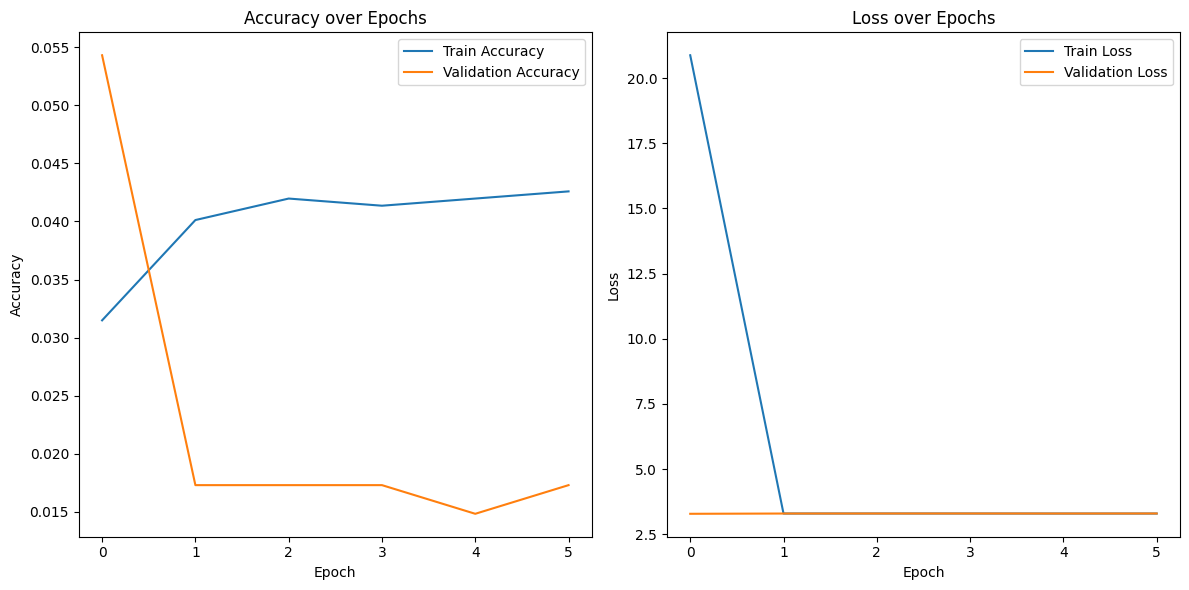

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
import pandas as pd
import numpy as np
import librosa
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Assuming 'Class Name' is the target and the features start from 'Feature_1' onward
X = df.drop(columns=['Class ID', 'Class Name']).values
y = pd.get_dummies(df['Class Name']).values  # One-hot encoding of class labels

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape the input data for CNN (as it expects 3D input)
X_train = X_train[..., np.newaxis]
X_val = X_val[..., np.newaxis]

# Define the CNN model
model = models.Sequential()

# Add Conv1D layers with increased depth
model.add(layers.Conv1D(64, 3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(layers.MaxPooling1D(2))

model.add(layers.Conv1D(128, 3, activation='relu'))
model.add(layers.MaxPooling1D(2))

model.add(layers.Conv1D(256, 3, activation='relu'))
model.add(layers.MaxPooling1D(2))

# Flatten the output of the Conv1D layers
model.add(layers.Flatten())

# Add fully connected layers
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))  # Dropout layer to reduce overfitting
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(y_train.shape[1], activation='softmax'))  # Output layer (softmax for multi-class)

# Compile the model with Adam optimizer and categorical crossentropy loss
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Set up learning rate scheduler and early stopping
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with callbacks
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val),
                    callbacks=[lr_scheduler, early_stopping])

# Evaluate the model on the validation data
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

# Plot the training and validation loss and accuracy to visualize overfitting
def plot_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Call the plot function to visualize training progress
plot_history(history)


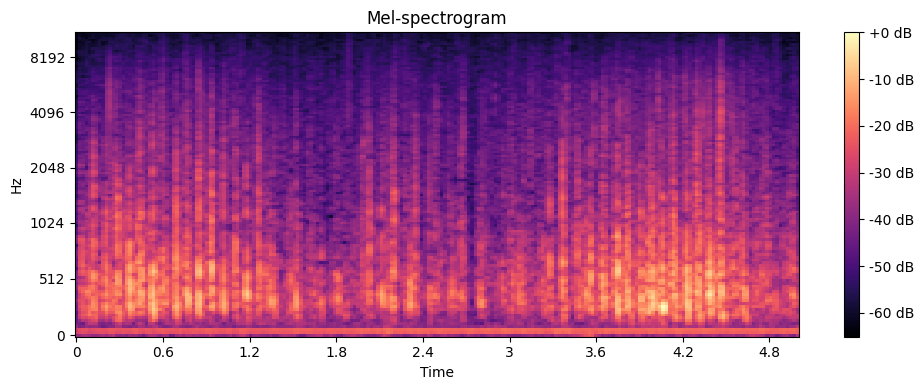

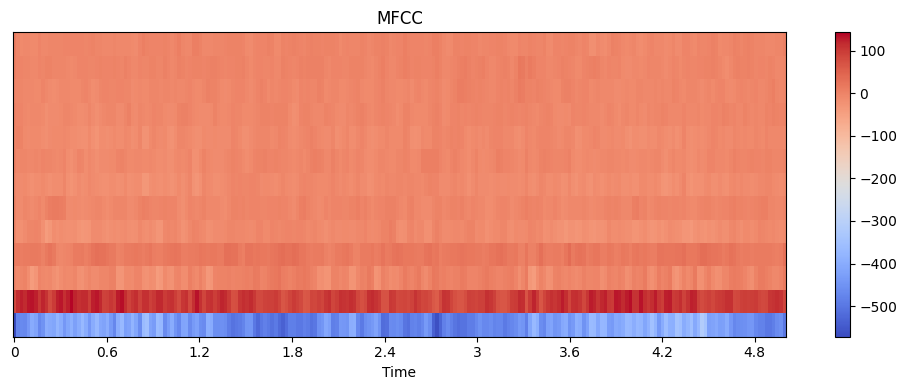

In [ ]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

def compute_mel_spectrogram(file_path, n_mels=128, fmax=8000):
    """
    Compute the Mel-spectrogram for a given audio file.

    Parameters:
    - file_path: Path to the audio file.
    - n_mels: Number of Mel bands to generate.
    - fmax: Maximum frequency to include in Mel scale.

    Returns:
    - mel_spectrogram: Mel-spectrogram matrix.
    """
    # Load the audio file
    y, sr = librosa.load(file_path)

    # Compute the STFT
    stft = librosa.stft(y)

    # Convert to Mel scale
    mel_spectrogram = librosa.feature.melspectrogram(S=np.abs(stft)**2, sr=sr, n_mels=n_mels, fmax=fmax)

    # Apply logarithmic compression
    log_mel_spectrogram = librosa.power_to_db(mel_spectrogram, ref=np.max)

    return log_mel_spectrogram

def extract_mfccs(log_mel_spectrogram, n_mfcc=13):
    """
    Extract MFCCs from the log Mel-spectrogram.

    Parameters:
    - log_mel_spectrogram: Log Mel-spectrogram matrix.
    - n_mfcc: Number of MFCCs to extract.

    Returns:
    - mfccs: Array of MFCC features.
    """
    # Apply Discrete Cosine Transform (DCT) to get MFCCs
    mfccs = librosa.feature.mfcc(S=log_mel_spectrogram, n_mfcc=n_mfcc)
    return mfccs

# Path to an audio file
file_path = fullpath1

# Compute Mel-spectrogram
log_mel_spectrogram = compute_mel_spectrogram(file_path)

# Plot Mel-spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(log_mel_spectrogram, sr=22050, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-spectrogram')
plt.tight_layout()
plt.show()

# Extract MFCCs from the Mel-spectrogram
mfccs = extract_mfccs(log_mel_spectrogram)

# Plot MFCCs
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, sr=22050, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
plt.show()


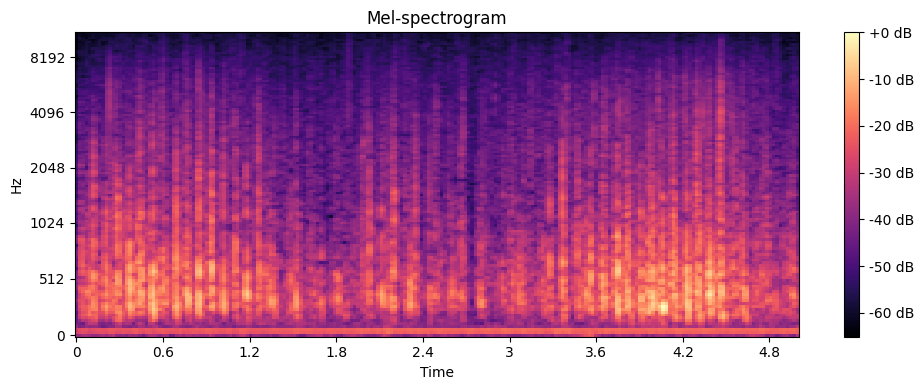

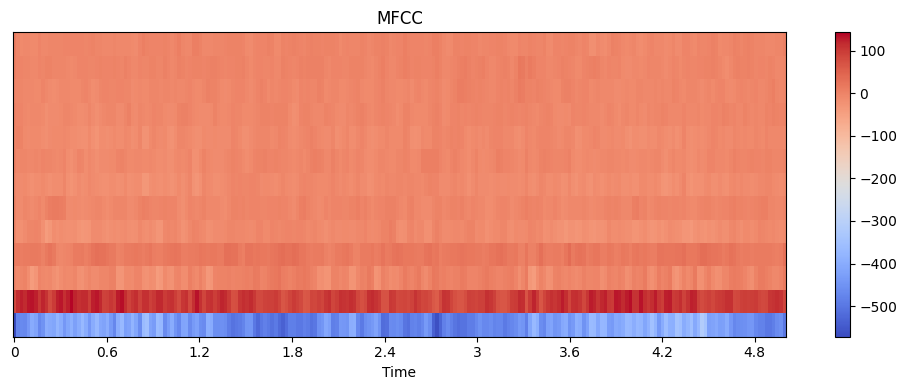

In [ ]:
filepath=fullpath2
# Compute Mel-spectrogram
log_mel_spectrogram = compute_mel_spectrogram(file_path)

# Plot Mel-spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(log_mel_spectrogram, sr=22050, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-spectrogram')
plt.tight_layout()
plt.show()

# Extract MFCCs from the Mel-spectrogram
mfccs = extract_mfccs(log_mel_spectrogram)

# Plot MFCCs
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, sr=22050, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
plt.show()


Class: Wind


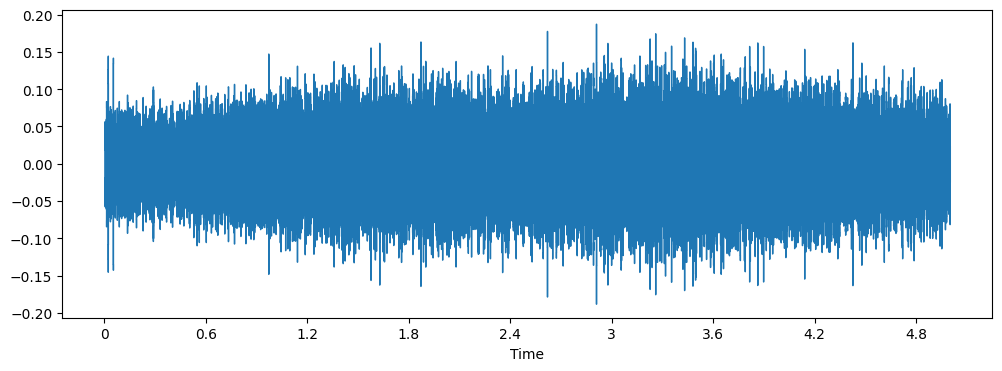

In [ ]:
index = random.choice(metadata.index)

print('Class:', metadata['Class Name'][index])
data, sampling_rate = librosa.load('/content/drive/MyDrive/Data Vision/Audio Files/'+str(metadata['Dataset File Name'][index]))

plt.figure(figsize=(12,4))
librosa.display.waveshow(data, sr=sampling_rate)

Class: Wind


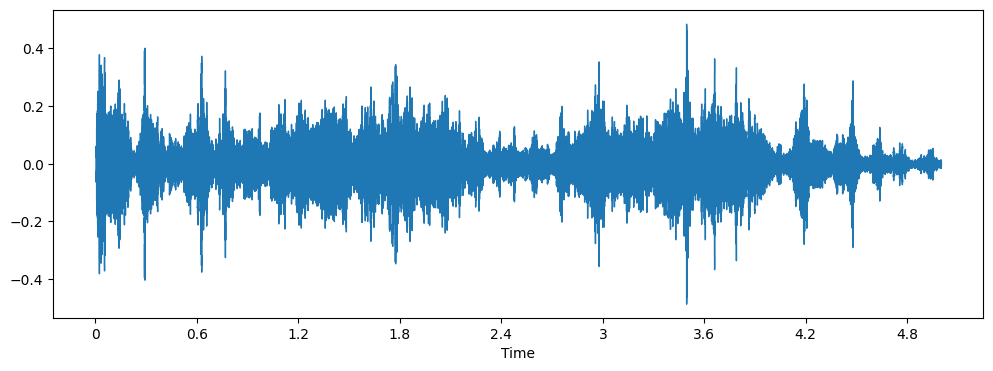

In [ ]:
# index = random.choice(metadata.index)

print('Class:', metadata['Class Name'][index])
data, sampling_rate = librosa.load('/content/drive/MyDrive/Data Vision/Noice Removed/'+str(metadata['Dataset File Name'][index]))

plt.figure(figsize=(12,4))
librosa.display.waveshow(data, sr=sampling_rate)

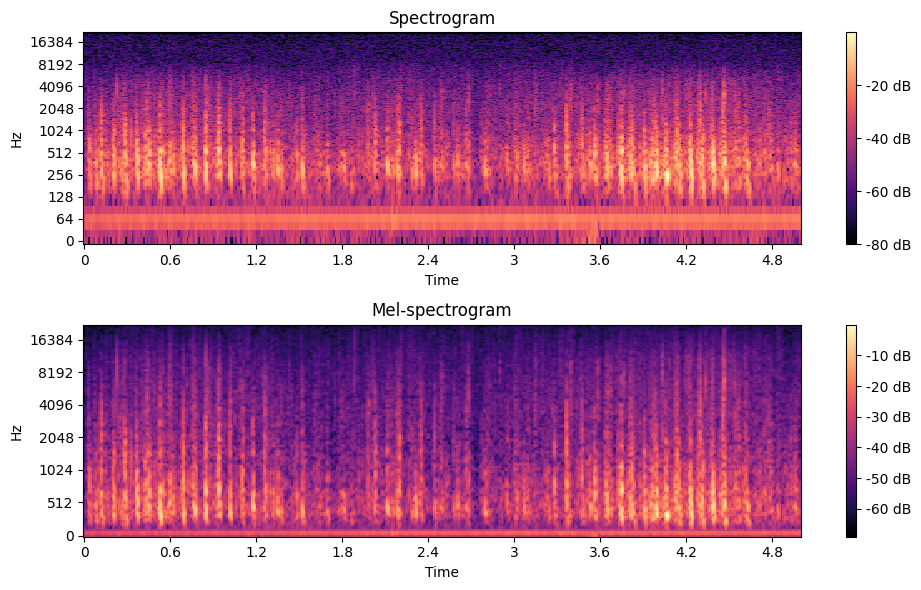

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Load an example audio file
file_path = fullpath1  # Replace with your file path

# Load the audio data using librosa (you can replace this with multiple files for different classes)
y, sr = librosa.load(file_path, sr=None)

# Compute the spectrogram
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)

# Compute the Mel-spectrogram
mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)
mel_spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)

# Plot the original spectrogram
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
plt.title('Spectrogram')
plt.colorbar(format='%+2.0f dB')

# Plot the Mel-spectrogram
plt.subplot(2, 1, 2)
librosa.display.specshow(mel_spectrogram_db, sr=sr, x_axis='time', y_axis='mel')
plt.title('Mel-spectrogram')
plt.colorbar(format='%+2.0f dB')

plt.tight_layout()
plt.show()


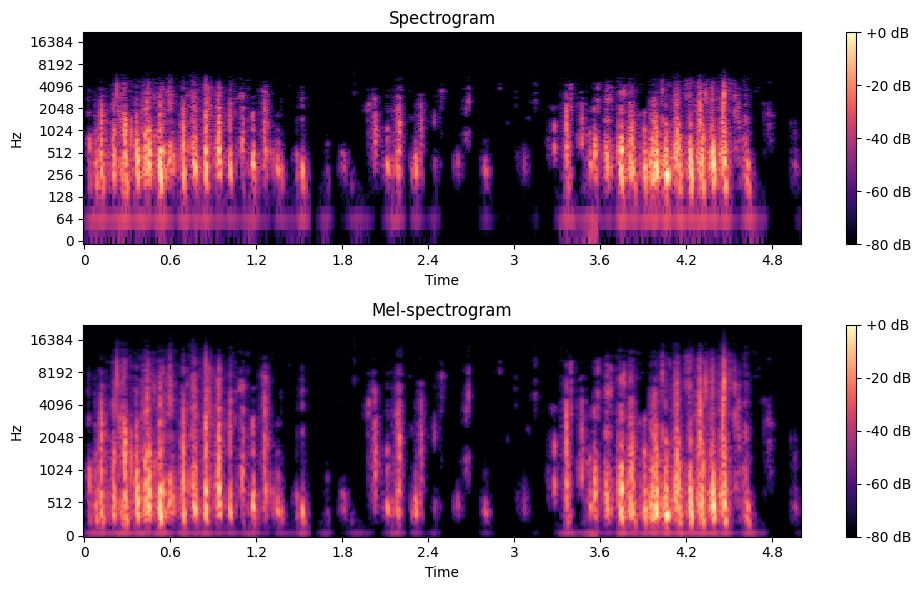

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Load an example audio file
file_path = fullpath2  # Replace with your file path

# Load the audio data using librosa (you can replace this with multiple files for different classes)
y, sr = librosa.load(file_path, sr=None)

# Compute the spectrogram
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)

# Compute the Mel-spectrogram
mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)
mel_spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)

# Plot the original spectrogram
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
plt.title('Spectrogram')
plt.colorbar(format='%+2.0f dB')

# Plot the Mel-spectrogram
plt.subplot(2, 1, 2)
librosa.display.specshow(mel_spectrogram_db, sr=sr, x_axis='time', y_axis='mel')
plt.title('Mel-spectrogram')
plt.colorbar(format='%+2.0f dB')

plt.tight_layout()
plt.show()


In [ ]:
import librosa
import numpy as np

# Load an audio file
file_path = fullpath1
y, sr = librosa.load(file_path, sr=None)

# Calculate Pitch (Fundamental Frequency)
pitches, magnitudes = librosa.core.piptrack(y=y, sr=sr)
pitch = []
for t in range(pitches.shape[1]):
    index = magnitudes[:, t].argmax()  # Get the index of the max magnitude
    pitch.append(pitches[index, t])  # Store the corresponding pitch value
pitch = np.array(pitch)
pitch = pitch[pitch > 0]

# Calculate Tempo (Beats per minute)
tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)

# Calculate Dominant Frequency
D = np.abs(librosa.stft(y))  # Compute the magnitude of the STFT
frequencies = librosa.core.fft_frequencies(sr=sr)
dominant_frequency = frequencies[np.argmax(D, axis=0)]

# Calculate Spectral Centroid
centroid = librosa.feature.spectral_centroid(y=y, sr=sr)

# Calculate Duration
duration = librosa.get_duration(y=y, sr=sr)

# Print the calculated features
print(f"Pitch (Fundamental Frequency): {pitch[:10]}...")
print(f"Tempo (BPM): {tempo}")
print(f"Dominant Frequency (first 10 frames): {dominant_frequency[:10]}")
print(f"Spectral Centroid (first 10 frames): {centroid[:, :10]}")
print(f"Duration (seconds): {duration}")


Pitch (Fundamental Frequency): [343.18713 472.07614 410.42374 392.5187  379.71338 385.55362 369.72122
 368.496   198.07622 193.96545]...
Tempo (BPM): [184.5703125]
Dominant Frequency (first 10 frames): [ 64.59960938  64.59960938  64.59960938 387.59765625 387.59765625
  64.59960938 366.06445312 366.06445312 193.79882812 193.79882812]
Spectral Centroid (first 10 frames): [[5254.86399945 5033.36366348 3396.11198792 2377.20032492 2368.05333875
  3409.36514317 3177.23013521 2281.01365015 2253.56493119 2553.24680139]]
Duration (seconds): 5.0


In [ ]:
import librosa
import numpy as np

# Load an audio file
file_path = fullpath2
y, sr = librosa.load(file_path, sr=None)

# Calculate Pitch (Fundamental Frequency)
pitches, magnitudes = librosa.core.piptrack(y=y, sr=sr)
pitch = []
for t in range(pitches.shape[1]):
    index = magnitudes[:, t].argmax()  # Get the index of the max magnitude
    pitch.append(pitches[index, t])  # Store the corresponding pitch value
pitch = np.array(pitch)
pitch = pitch[pitch > 0]

# Calculate Tempo (Beats per minute)
tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)

# Calculate Dominant Frequency
D = np.abs(librosa.stft(y))  # Compute the magnitude of the STFT
frequencies = librosa.core.fft_frequencies(sr=sr)
dominant_frequency = frequencies[np.argmax(D, axis=0)]

# Calculate Spectral Centroid
centroid = librosa.feature.spectral_centroid(y=y, sr=sr)

# Calculate Duration
duration = librosa.get_duration(y=y, sr=sr)

# Print the calculated features
print(f"Pitch (Fundamental Frequency): {pitch[:10]}...")
print(f"Tempo (BPM): {tempo}")
print(f"Dominant Frequency (first 10 frames): {dominant_frequency[:10]}")
print(f"Spectral Centroid (first 10 frames): {centroid[:, :10]}")
print(f"Duration (seconds): {duration}")


Pitch (Fundamental Frequency): [689.0328  692.99384 794.41016 608.0832  687.7193  583.4349  368.97086
 367.903   198.88283 472.70673]...
Tempo (BPM): [184.5703125]
Dominant Frequency (first 10 frames): [ 64.59960938 689.0625     796.72851562 602.9296875  689.0625
 581.39648438 366.06445312 366.06445312 193.79882812 473.73046875]
Spectral Centroid (first 10 frames): [[1403.68856329 1207.70714011 1110.67414998  819.94681752  691.86661528
   706.30453155  792.70688957  642.14822417  625.46639252  948.44951264]]
Duration (seconds): 5.0


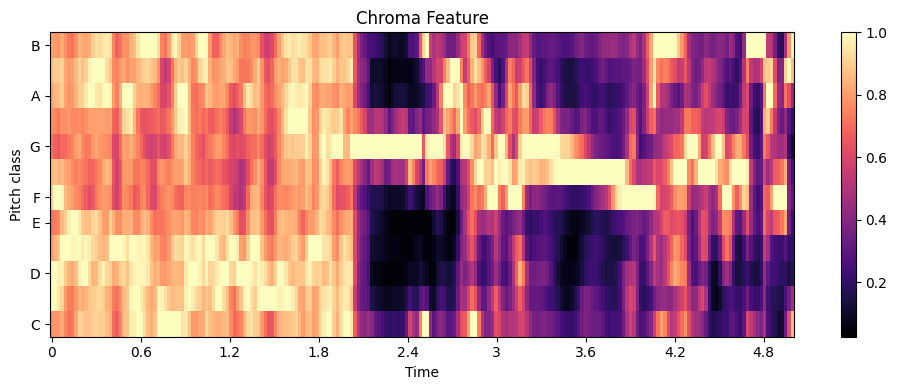

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load the audio file
audio_path = fullpath2
y, sr = librosa.load(audio_path, sr=22050)  # Using a common sampling rate, or set sr=None to keep original rate

# Calculate Chroma feature
chroma = librosa.feature.chroma_stft(y=y, sr=sr, n_chroma=12, n_fft=4096)

# Display Chroma
plt.figure(figsize=(10, 4))
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time', sr=sr)
plt.colorbar()
plt.title('Chroma Feature')
plt.tight_layout()
plt.show()


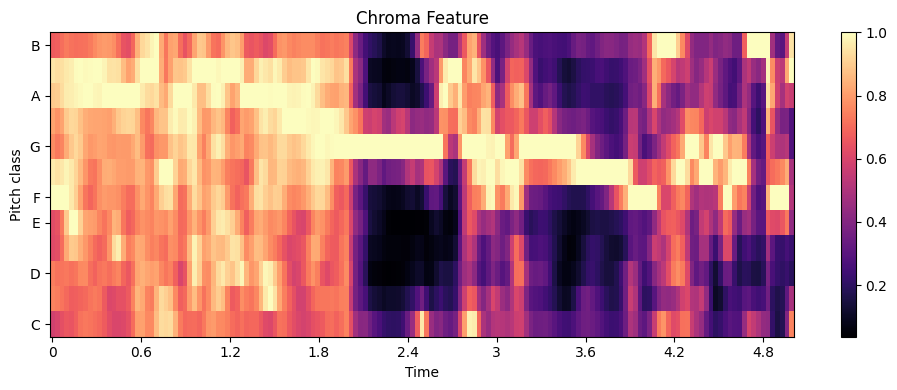

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load the audio file
audio_path = fullpath2
y, sr = librosa.load(audio_path, sr=16000)  # Using a common sampling rate, or set sr=None to keep original rate

# Calculate Chroma feature
chroma = librosa.feature.chroma_stft(y=y, sr=sr, n_chroma=12, n_fft=4096)

# Display Chroma
plt.figure(figsize=(10, 4))
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time', sr=sr)
plt.colorbar()
plt.title('Chroma Feature')
plt.tight_layout()
plt.show()


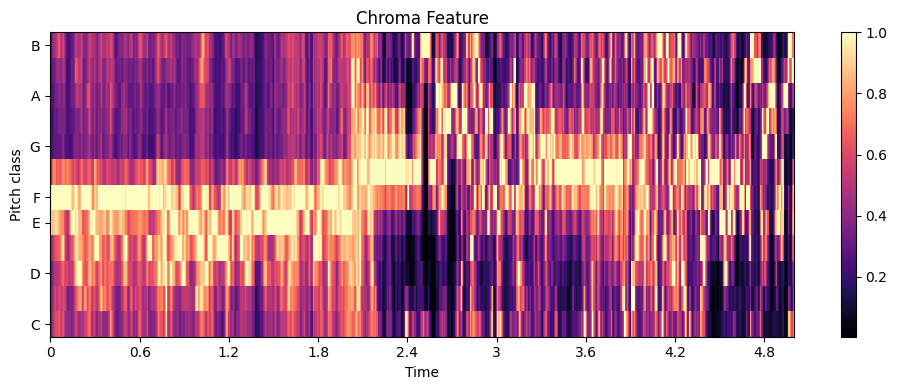

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt


y, sr = librosa.load(audio_path, sr=None)  # Using a common sampling rate, or set sr=None to keep original rate

# Calculate Chroma feature
chroma = librosa.feature.chroma_stft(y=y, sr=sr, n_chroma=12, n_fft=4096)

# Display Chroma
plt.figure(figsize=(10, 4))
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time', sr=sr)
plt.colorbar()
plt.title('Chroma Feature')
plt.tight_layout()
plt.show()


In [ ]:
metadata['Class Name'].value_counts()

Class Name
Fire             75
Gunshot          75
WolfHowl         75
Lion             75
WingFlaping      75
BirdChirping     75
Frog             75
Insect           75
Clapping         75
Footsteps        75
Speaking         75
Whistling        75
WoodChop         75
Firework         75
Rain             75
Handsaw          75
Generator        75
Chainsaw         75
Axe              75
VehicleEngine    75
Helicopter       75
TreeFalling      75
Silence          75
Wind             75
WaterDrops       75
Thunderstorm     75
Squirrel         75
Name: count, dtype: int64

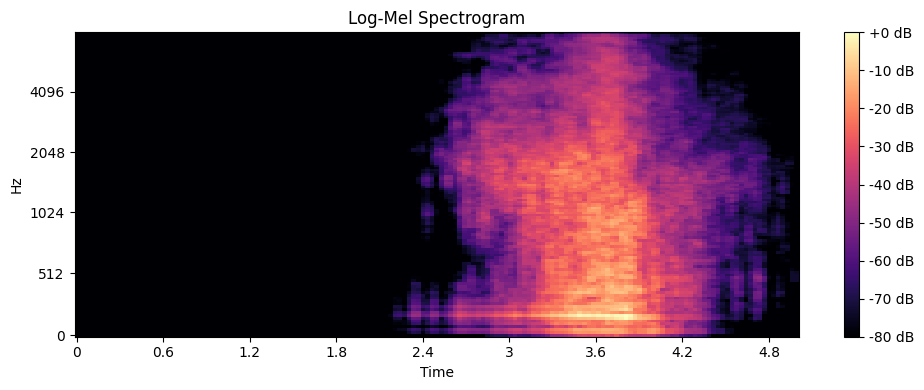

In [ ]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

# Load the audio file
audio_path = fullpath2  # Replace with the path to your audio file
y, sr = librosa.load(audio_path, sr=16000)  # Set a fixed sampling rate (e.g., 16000 Hz)

# Calculate the Mel Spectrogram
n_mels = 128  # Number of Mel bands
mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels, n_fft=2048, hop_length=512)

# Convert to Log-Mel Spectrogram
log_mel_spectrogram = librosa.power_to_db(mel_spectrogram, ref=np.max)

# Display Log-Mel Spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(log_mel_spectrogram, sr=sr, hop_length=512, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Log-Mel Spectrogram')
plt.tight_layout()
plt.show()


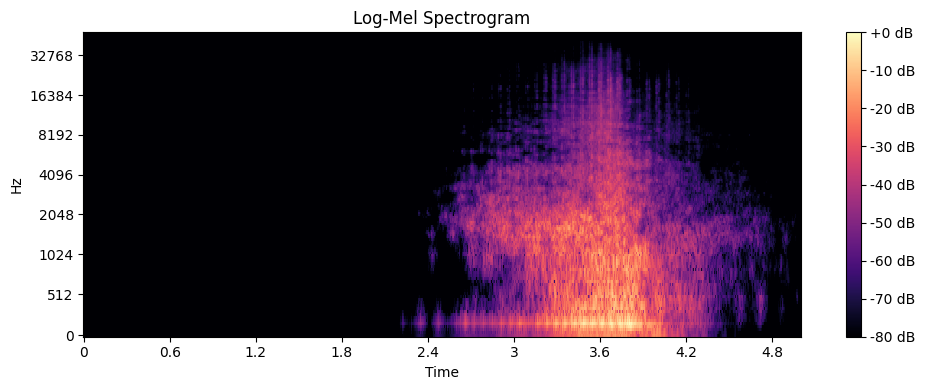

In [ ]:

import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

# Load the audio file
audio_path = fullpath2
y, sr = librosa.load(audio_path, sr=None)  # Set a fixed sampling rate (e.g., 16000 Hz)

# Calculate the Mel Spectrogram
n_mels = 128  # Number of Mel bands
mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels, n_fft=2048, hop_length=512)

# Convert to Log-Mel Spectrogram
log_mel_spectrogram = librosa.power_to_db(mel_spectrogram, ref=np.max)

# Display Log-Mel Spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(log_mel_spectrogram, sr=sr, hop_length=512, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Log-Mel Spectrogram')
plt.tight_layout()
plt.show()


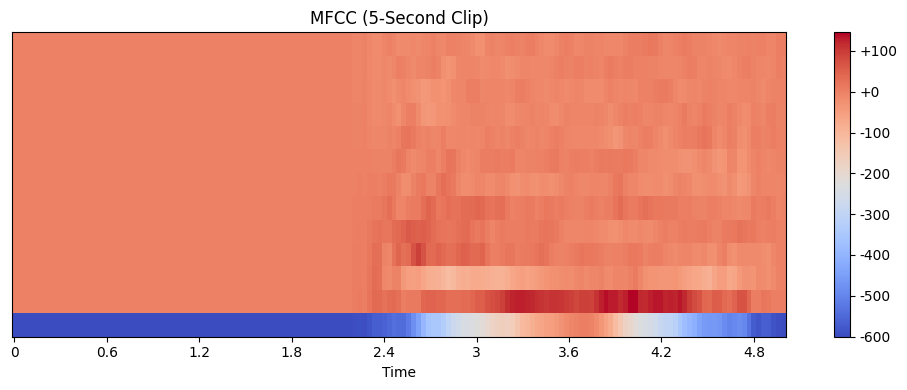

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Parameters
sampling_rate = 16000  # Fixed sampling rate
duration = 5           # Duration of each audio clip in seconds
n_mfcc = 13            # Number of MFCCs to compute

def load_and_preprocess(audio_path, sr=sampling_rate, duration=duration):
    # Load audio file with librosa
    y, _ = librosa.load(audio_path, sr=sr)

    # Ensure 5 seconds by padding or truncating
    target_length = sr * duration
    if len(y) < target_length:
        # Pad with zeros if audio is shorter than 5 seconds
        y = np.pad(y, (0, target_length - len(y)), 'constant')
    else:
        # Truncate if audio is longer than 5 seconds
        y = y[:target_length]

    return y, sr

def extract_mfcc(y, sr, n_mfcc=n_mfcc):
    # Compute MFCC features
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    return mfccs

audio_path=fullpath2  # Replace with your file path

# Load and preprocess the audio
y, sr = load_and_preprocess(audio_path)

# Extract MFCCs
mfccs = extract_mfcc(y, sr)

# Display MFCCs
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis='time', sr=sr)
plt.colorbar(format='%+2.0f')
plt.title('MFCC (5-Second Clip)')
plt.tight_layout()
plt.show()


In [ ]:
metadata

Source File Name Dataset File Name  \
0                                          17548__A.wav       1_10101.wav   
1                                           17548_B.wav       1_10102.wav   
2                                           17548_C.wav       1_10103.wav   
3                                           17548_D.wav       1_10104.wav   
4                                           17548_E.wav       1_10105.wav   
...                                                 ...               ...   
2020                   164882__timsc__squirrel-call.wav      27_12771.wav   
2021  162648__cognito-perceptu__park-bench-atmospher...      27_12772.wav   
2022         122260__echobones__angry-squirrel-long.wav      27_12773.wav   
2023  82828__noisecollector__angrysquirrel-creepingt...      27_12774.wav   
2024  82829__noisecollector__angrysquirrel-flyingair...      27_12775.wav   

      Class ID Class Name  
0            1       Fire  
1            1       Fire  
2            1       Fire  
3            1       Fire  
4            1       Fire  
...        ...        ...  
2020        27   Squirrel  
2021        27   Squirrel  
2022        27   Squirrel  
2023        27   Squirrel  
2024        27   Squirrel  

[2025 rows x 4 columns]

In [ ]:
# Import necessary libraries
import os
import pandas as pd
import librosa
import numpy as np
from tqdm import tqdm  # For progress tracking


In [ ]:
# Function to extract features (MFCC, Chroma, LogMel) from an audio file
def extract_features_from_audio(file_path, sr=16000, n_mfcc=13, n_chroma=12, n_mels=128):
    """
    Extracts MFCC, Chroma, and Log-Mel Spectrogram features from an audio file.

    Parameters:
        file_path (str): Path to the audio file.
        sr (int): Sampling rate for audio files.
        n_mfcc (int): Number of MFCC coefficients.
        n_chroma (int): Number of chroma features.
        n_mels (int): Number of mel bands for the spectrogram.

    Returns:
        dict: Dictionary with MFCC, Chroma, Log-Mel Spectrogram features.
    """
    y, _ = librosa.load(file_path, sr=sr)

    # Ensure 5 seconds (pad or trim)
    target_length = sr * 5
    if len(y) < target_length:
        y = np.pad(y, (0, target_length - len(y)), 'constant')
    else:
        y = y[:target_length]

    # Extract features
    features = {}
    features['mfcc'] = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc).T, axis=0)
    features['chroma'] = np.mean(librosa.feature.chroma_stft(y=y, sr=sr, n_chroma=n_chroma).T, axis=0)
    log_mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels)
    features['logmel'] = np.mean(librosa.power_to_db(log_mel_spec).T, axis=0)

    return features


In [ ]:
# Function to create a DataFrame of extracted features
def create_feature_dataframe(metadata, audio_dir, sr=16000, n_mfcc=13, n_chroma=12, n_mels=128):
    """
    Creates a DataFrame of extracted features for each audio file.

    Parameters:
        metadata (pd.DataFrame): Metadata containing 'Data File Name' and labels.
        audio_dir (str): Directory containing the audio files.
        sr, n_mfcc, n_chroma, n_mels: Feature extraction parameters.

    Returns:
        pd.DataFrame: DataFrame with extracted features and labels.
    """
    data = []

    for _, row in tqdm(metadata.iterrows(), total=len(metadata)):
        file_name = row['Dataset File Name']
        label = row['Class Name']
        file_path = os.path.join(audio_dir, file_name)

        try:
            features = extract_features_from_audio(file_path, sr=sr, n_mfcc=n_mfcc, n_chroma=n_chroma, n_mels=n_mels)
            # Flatten features for DataFrame compatibility
            row_data = {
                **{f'mfcc_{i+1}': features['mfcc'][i] for i in range(n_mfcc)},
                **{f'chroma_{i+1}': features['chroma'][i] for i in range(n_chroma)},
                **{f'logmel_{i+1}': features['logmel'][i] for i in range(n_mels)},
                'label': label
            }
            data.append(row_data)

        except Exception as e:
            print(f"Error processing file {file_name}: {e}")
            continue

    # Create DataFrame
    feature_df = pd.DataFrame(data)
    return feature_df


In [ ]:


# Set the directory containing your audio files
audio_dir = '/content/drive/MyDrive/Data Vision/Noice Removed'  # Replace with your actual audio directory


In [ ]:
# Run the feature extraction and create DataFrame
feature_df = create_feature_dataframe(metadata, audio_dir)




100%|██████████| 2025/2025 [09:37<00:00,  3.51it/s]


In [ ]:
feature_df

mfcc_1     mfcc_2     mfcc_3     mfcc_4     mfcc_5     mfcc_6  \
0    -339.523438  -8.273686  19.643457  17.067703  15.627934  20.989330   
1    -259.768951  13.796847  30.805658  33.126743  21.658724  18.685678   
2    -277.261139  11.484535  22.686375  27.382433  32.829502  22.947369   
3    -288.158264  12.754638  19.371738  20.264032  20.935232  21.430502   
4    -258.643555   7.867485  17.125622  25.109905  22.752758  23.216623   
...          ...        ...        ...        ...        ...        ...   
2020 -555.092163  69.390663 -15.671305 -12.254935 -13.629846   8.927927   
2021 -280.085083  85.168663 -12.452709   1.254082   7.734020  12.915027   
2022 -445.537567  86.280045  15.460524   7.629234  -1.675268  17.568092   
2023 -488.946655  43.242928  33.307674  50.453487  32.058273  24.121838   
2024 -522.713501  71.330009  38.138294  32.773800   6.926744   4.094053   

         mfcc_7     mfcc_8    mfcc_9    mfcc_10  ...  logmel_120  logmel_121  \
0     14.792226  10.748375  9.111164   7.909683  ...  -26.238884  -25.088106   
1     15.722818  14.978027  7.378653   9.776155  ...  -22.203110  -21.676670   
2     14.735126  10.373060  7.610537  10.946317  ...  -22.520191  -22.288956   
3     14.455638  12.557729  6.952843  11.665636  ...  -23.065876  -23.386631   
4     13.471829  12.084171  5.262684   6.653051  ...  -22.540300  -22.566410   
...         ...        ...       ...        ...  ...         ...         ...   
2020  -1.890776   5.643713 -1.554233  -6.798110  ...  -60.779289  -61.014442   
2021  -1.603692  16.407759  5.317902   9.371097  ...  -37.313957  -36.661606   
2022  10.741326   7.350626  2.229179   7.831716  ...  -49.897343  -49.700264   
2023   7.207821  16.332069  0.412403   2.177838  ...  -47.642342  -48.055199   
2024   3.925250   9.263410  1.978914   2.046685  ...  -53.100735  -53.207535   

      logmel_122  logmel_123  logmel_124  logmel_125  logmel_126  logmel_127  \
0     -25.286951  -25.492390  -25.177284  -25.283669  -26.458368  -29.748402   
1     -21.801062  -21.099525  -20.473866  -20.362963  -22.082397  -26.088726   
2     -23.152777  -22.441450  -21.692030  -21.769917  -22.286787  -25.675325   
3     -23.769577  -24.557009  -25.109482  -25.068314  -25.085733  -28.656271   
4     -22.145588  -21.772415  -21.771475  -21.821596  -22.584307  -25.646122   
...          ...         ...         ...         ...         ...         ...   
2020  -60.932323  -60.388348  -60.332199  -60.189739  -59.287941  -59.888603   
2021  -37.512085  -38.198318  -38.192070  -37.416340  -37.219467  -40.595528   
2022  -49.007824  -48.566704  -49.207626  -49.555889  -49.938591  -51.743679   
2023  -48.345005  -48.604485  -49.647572  -49.040661  -49.698303  -51.541630   
2024  -53.243431  -53.428856  -53.153824  -53.819534  -54.039051  -55.126774   

      logmel_128     label  
0     -41.504086      Fire  
1     -38.632919      Fire  
2     -37.586449      Fire  
3     -40.959465      Fire  
4     -36.565323      Fire  
...          ...       ...  
2020  -61.034981  Squirrel  
2021  -52.918316  Squirrel  
2022  -57.044174  Squirrel  
2023  -54.958015  Squirrel  
2024  -58.055496  Squirrel  

[2025 rows x 154 columns]

In [ ]:
feature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2025 entries, 0 to 2024
Columns: 154 entries, mfcc_1 to label
dtypes: float32(153), object(1)
memory usage: 1.2+ MB


In [ ]:
missing_values = feature_df.isnull().sum()
print(missing_values)

mfcc_1        0
mfcc_2        0
mfcc_3        0
mfcc_4        0
mfcc_5        0
             ..
logmel_125    0
logmel_126    0
logmel_127    0
logmel_128    0
label         0
Length: 154, dtype: int64


In [ ]:
# Save the DataFrame to CSV
output_csv_path = '/content/drive/MyDrive/Data Vision/final.csv'
feature_df.to_csv(output_csv_path, index=False)

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Data Vision/final.csv')

In [ ]:
df

mfcc_1     mfcc_2     mfcc_3     mfcc_4     mfcc_5     mfcc_6  \
0    -339.52344  -8.273686  19.643457  17.067703  15.627934  20.989330   
1    -259.76895  13.796847  30.805658  33.126743  21.658724  18.685678   
2    -277.26114  11.484535  22.686375  27.382433  32.829502  22.947369   
3    -288.15826  12.754638  19.371738  20.264032  20.935232  21.430502   
4    -258.64355   7.867485  17.125622  25.109905  22.752758  23.216623   
...         ...        ...        ...        ...        ...        ...   
2020 -555.09216  69.390660 -15.671305 -12.254935 -13.629846   8.927927   
2021 -280.08508  85.168660 -12.452709   1.254082   7.734020  12.915027   
2022 -445.53757  86.280045  15.460524   7.629234  -1.675268  17.568092   
2023 -488.94666  43.242928  33.307674  50.453487  32.058273  24.121838   
2024 -522.71350  71.330010  38.138294  32.773800   6.926744   4.094053   

         mfcc_7     mfcc_8    mfcc_9    mfcc_10  ...  logmel_120  logmel_121  \
0     14.792226  10.748375  9.111164   7.909683  ...  -26.238884  -25.088106   
1     15.722818  14.978027  7.378653   9.776155  ...  -22.203110  -21.676670   
2     14.735126  10.373060  7.610537  10.946317  ...  -22.520191  -22.288956   
3     14.455638  12.557729  6.952843  11.665636  ...  -23.065876  -23.386631   
4     13.471829  12.084171  5.262684   6.653051  ...  -22.540300  -22.566410   
...         ...        ...       ...        ...  ...         ...         ...   
2020  -1.890776   5.643713 -1.554233  -6.798109  ...  -60.779290  -61.014442   
2021  -1.603692  16.407759  5.317902   9.371097  ...  -37.313957  -36.661606   
2022  10.741326   7.350626  2.229179   7.831716  ...  -49.897343  -49.700264   
2023   7.207821  16.332070  0.412403   2.177838  ...  -47.642340  -48.055200   
2024   3.925250   9.263410  1.978914   2.046685  ...  -53.100735  -53.207535   

      logmel_122  logmel_123  logmel_124  logmel_125  logmel_126  logmel_127  \
0     -25.286951  -25.492390  -25.177284  -25.283669  -26.458368  -29.748402   
1     -21.801062  -21.099525  -20.473866  -20.362963  -22.082397  -26.088726   
2     -23.152777  -22.441450  -21.692030  -21.769917  -22.286787  -25.675325   
3     -23.769577  -24.557009  -25.109482  -25.068314  -25.085733  -28.656271   
4     -22.145588  -21.772415  -21.771475  -21.821596  -22.584307  -25.646122   
...          ...         ...         ...         ...         ...         ...   
2020  -60.932323  -60.388348  -60.332200  -60.189740  -59.287940  -59.888603   
2021  -37.512085  -38.198320  -38.192070  -37.416340  -37.219467  -40.595528   
2022  -49.007824  -48.566704  -49.207626  -49.555890  -49.938590  -51.743680   
2023  -48.345005  -48.604485  -49.647570  -49.040660  -49.698303  -51.541630   
2024  -53.243430  -53.428856  -53.153824  -53.819534  -54.039050  -55.126774   

      logmel_128     label  
0     -41.504086      Fire  
1     -38.632920      Fire  
2     -37.586450      Fire  
3     -40.959465      Fire  
4     -36.565323      Fire  
...          ...       ...  
2020  -61.034980  Squirrel  
2021  -52.918316  Squirrel  
2022  -57.044174  Squirrel  
2023  -54.958015  Squirrel  
2024  -58.055496  Squirrel  

[2025 rows x 154 columns]

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
feature_df=df.copy()
# Split into features (X) and labels (y)
X = feature_df.drop(columns=['label'])
y = feature_df['label']

# Encode labels (if categorical)
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape the data for the ResNet model (needed if you use it for tabular data)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


In [ ]:
from tensorflow.keras import layers, models

def build_custom_nn_model(input_shape):
    model = models.Sequential()

    # Input layer and first hidden layer
    model.add(layers.InputLayer(input_shape=input_shape))
    model.add(layers.Dense(512, activation='relu'))  # Dense layer
    model.add(layers.Dropout(0.5))  # Dropout to prevent overfitting

    # Second hidden layer
    model.add(layers.Dense(256, activation='relu'))  # Dense layer
    model.add(layers.Dropout(0.5))  # Dropout to prevent overfitting

    # Output layer (softmax for multi-class classification)
    model.add(layers.Dense(len(np.unique(y)), activation='softmax'))

    # Compile the model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model

# Build the model
input_shape = (X_train.shape[1],)  # No need for an additional dimension
model = build_custom_nn_model(input_shape)

# Print model summary
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 512)               78848     
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 256)               131328    
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 27)                6939      
                                                                 
Total params: 217115 (848.11 KB)
Trainable params: 217115 (848.11 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/300
51/51 [==============================] - 1s 8ms/step - loss: 3.3456 - accuracy: 0.0401 - val_loss: 3.2614 - val_accuracy: 0.0593
Epoch 2/300
51/51 [==============================] - 0s 5ms/step - loss: 3.2837 - accuracy: 0.0469 - val_loss: 3.2163 - val_accuracy: 0.0864
Epoch 3/300
51/51 [==============================] - 0s 5ms/step - loss: 3.2360 - accuracy: 0.0549 - val_loss: 3.1727 - val_accuracy: 0.0790
Epoch 4/300
51/51 [==============================] - 0s 5ms/step - loss: 3.1767 - accuracy: 0.0784 - val_loss: 3.0482 - val_accuracy: 0.1481
Epoch 5/300
51/51 [==============================] - 0s 5ms/step - loss: 3.0834 - accuracy: 0.1080 - val_loss: 2.9403 - val_accuracy: 0.1259
Epoch 6/300
51/51 [==============================] - 0s 5ms/step - loss: 3.0161 - accuracy: 0.1160 - val_loss: 2.8555 - val_accuracy: 0.1333
Epoch 7/300
51/51 [==============================] - 0s 5ms/step - loss: 2.9373 - accuracy: 0.1278 - val_loss: 2.7739 - val_accuracy: 0.1827
Epoch 8/300
5

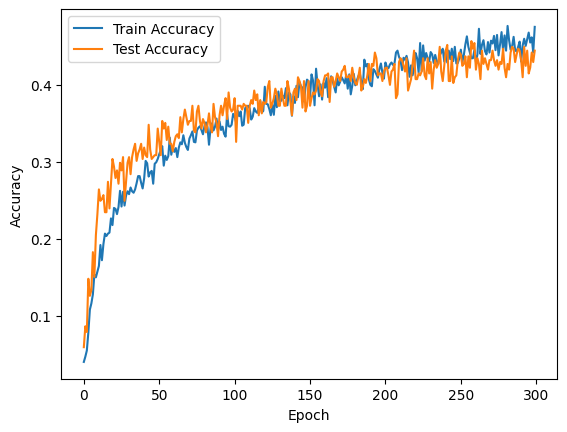

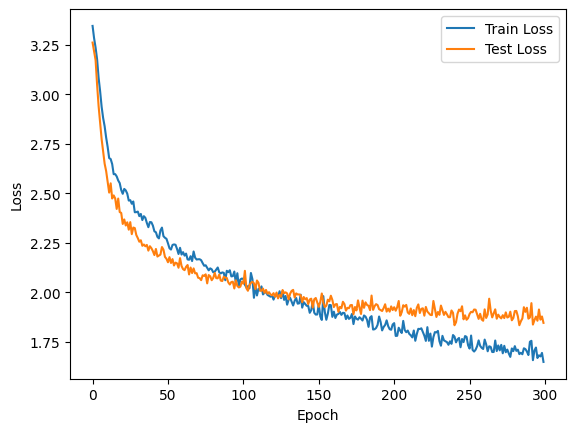

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=300, batch_size=32, validation_data=(X_test, y_test))

# Plotting accuracy and loss (optional)
import matplotlib.pyplot as plt

# Accuracy Plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss Plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test)

print(f"Test Accuracy: {test_acc}")
print(f"Test Loss: {test_loss}")


13/13 [==============================] - 0s 2ms/step - loss: 1.8448 - accuracy: 0.4444
Test Accuracy: 0.4444444477558136
Test Loss: 1.8448435068130493


In [ ]:
import xgboost as xgb

# Initialize XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Reshape X_train and X_test back to 2D before fitting XGBoost
X_train_2d = X_train.reshape(X_train.shape[0], X_train.shape[1])
X_test_2d = X_test.reshape(X_test.shape[0], X_test.shape[1])

# Train the model using the reshaped data
xgb_model.fit(X_train_2d, y_train)

# Evaluate the model
xgb_test_acc = xgb_model.score(X_test_2d, y_test)
print(f"XGBoost Test Accuracy: {xgb_test_acc}")

XGBoost Test Accuracy: 0.47160493827160493


In [ ]:
pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.0/199.0 MB 5.5 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers, models
import xgboost as xgb



# Assuming 'feature_df' contains the extracted features (mfcc_1, mfcc_2, ..., mfcc_n) and 'label'
X = feature_df.drop(columns=['label'])  # Features (e.g., mfcc_1 to mfcc_153)
y = feature_df['label']  # Labels



# Convert labels to numerical representation using LabelEncoder
# from sklearn.preprocessing import LabelEncoder # Already imported
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Store the number of unique classes
num_classes = len(np.unique(y)) # Get the number of unique classes from the encoded 'y'

# Splitting the data into training and testing sets
#from sklearn.model_selection import train_test_split # Already imported
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Standardizing the features
#from sklearn.preprocessing import StandardScaler # Already imported
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape data to have one "channel" for 1D convolution
#import numpy as np # Already imported
X_train = np.expand_dims(X_train, axis=-1)  # Shape: (num_samples, num_features, 1)
X_test = np.expand_dims(X_test, axis=-1)  # Shape: (num_samples, num_features, 1)


In [ ]:
def build_resnet_model(input_shape):
    input = layers.Input(shape=input_shape)

    # Initial convolutional block
    x = layers.Conv1D(64, kernel_size=3, strides=1, padding='same', activation='relu')(input)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling1D(pool_size=2)(x)

    # Residual block 1
    shortcut = x
    x = layers.Conv1D(64, kernel_size=3, strides=1, padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv1D(64, kernel_size=3, strides=1, padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)

    # Ensure the shortcut and output have the same number of channels
    shortcut = layers.Conv1D(64, kernel_size=1, strides=1, padding='same')(shortcut)  # Match channels
    x = layers.add([x, shortcut])  # Adding the residual
    x = layers.MaxPooling1D(pool_size=2)(x)

    # Residual block 2
    shortcut = x
    x = layers.Conv1D(128, kernel_size=3, strides=1, padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv1D(128, kernel_size=3, strides=1, padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)

    # Ensure the shortcut and output have the same number of channels
    shortcut = layers.Conv1D(128, kernel_size=1, strides=1, padding='same')(shortcut)

    # Ensure the shortcut and output have the same number of channels
    shortcut = layers.Conv1D(128, kernel_size=1, strides=1, padding='same')(shortcut)  # Match channels
    x = layers.add([x, shortcut])  # Adding the residual
    x = layers.MaxPooling1D(pool_size=2)(x)

    # Fully connected layers
    x = layers.Flatten()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    output = layers.Dense(len(np.unique(y)), activation='softmax')(x)  # Multi-class classification

    model = models.Model(inputs=input, outputs=output)

    # Compile the model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model


In [ ]:
# Build the model
input_shape = (X_train.shape[1], 1)  # Shape should be (num_features, 1)
model = build_resnet_model(input_shape)

# Print model summary
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=300, batch_size=32, validation_data=(X_test, y_test))


Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_9 (InputLayer)        [(None, 153, 1)]             0         []                            
                                                                                                  
 conv1d_39 (Conv1D)          (None, 153, 64)              256       ['input_9[0][0]']             
                                                                                                  
 batch_normalization_30 (Ba  (None, 153, 64)              256       ['conv1d_39[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 max_pooling1d_16 (MaxPooli  (None, 76, 64)               0         ['batch_normalization_30

In [ ]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test)

print(f"Test Accuracy: {test_acc}")
print(f"Test Loss: {test_loss}")

13/13 [==============================] - 0s 8ms/step - loss: 5.3457 - accuracy: 0.5457
Test Accuracy: 0.5456790328025818
Test Loss: 5.345706939697266


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

def build_dnn_model(input_shape, num_classes):
    model = models.Sequential()

    # Input layer (flatten the data)
    model.add(layers.InputLayer(input_shape=input_shape))

    # Hidden layers
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dropout(0.5))

    # Output layer
    model.add(layers.Dense(num_classes, activation='softmax'))  # softmax for multi-class classification

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model


In [ ]:
import numpy as np

# If y is numpy.ndarray, convert it to pandas Series
y = pd.Series(y)  # This is optional if you want to work with Pandas Series

# Now you can safely use the unique() method
num_classes = len(y.unique())

# Continue with the rest of the model building process


In [ ]:
# Get the number of classes in your labels
num_classes = len(y.unique())

# Build the model
input_shape = X_train.shape[1]  # Number of features in X_train
model = build_dnn_model((input_shape,), num_classes)

# Train the model
history = model.fit(X_train, y_train, epochs=200, batch_size=64, validation_data=(X_test, y_test))


Epoch 1/200
26/26 [==============================] - 1s 12ms/step - loss: 3.2576 - accuracy: 0.0951 - val_loss: 2.7082 - val_accuracy: 0.2296
Epoch 2/200
26/26 [==============================] - 0s 6ms/step - loss: 2.8125 - accuracy: 0.1827 - val_loss: 2.4476 - val_accuracy: 0.2864
Epoch 3/200
26/26 [==============================] - 0s 6ms/step - loss: 2.6531 - accuracy: 0.2321 - val_loss: 2.3201 - val_accuracy: 0.3136
Epoch 4/200
26/26 [==============================] - 0s 6ms/step - loss: 2.5482 - accuracy: 0.2617 - val_loss: 2.2282 - val_accuracy: 0.3235
Epoch 5/200
26/26 [==============================] - 0s 6ms/step - loss: 2.4451 - accuracy: 0.2907 - val_loss: 2.2030 - val_accuracy: 0.3358
Epoch 6/200
26/26 [==============================] - 0s 6ms/step - loss: 2.3564 - accuracy: 0.2870 - val_loss: 2.1428 - val_accuracy: 0.3506
Epoch 7/200
26/26 [==============================] - 0s 6ms/step - loss: 2.2997 - accuracy: 0.3099 - val_loss: 2.0912 - val_accuracy: 0.3556
Epoch 8/200


In [ ]:

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")

13/13 [==============================] - 0s 2ms/step - loss: 2.0373 - accuracy: 0.5284
Test Loss: 2.037325143814087
Test Accuracy: 0.5283950567245483


In [ ]:
# !pip install tensorflow
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import numpy as np



def build_resnet_model(input_shape, num_classes):
    """
    Builds a ResNet50-based model with custom classification layers.

    Args:
        input_shape: Tuple specifying the input shape for the model (height, width, channels).
        num_classes: The number of classes for classification.

    Returns:
        A Keras Model object.
    """
    # Load the pre-trained ResNet50 model without the top classification layers
    # and using the specified input shape
    # If your input images have only 1 channel, use include_top=False and weights=None
    # or create your own custom weights for a single-channel ResNet50.
    if input_shape[-1] != 3:  # Check if the input has 3 channels
        # For 1-channel input, initialize with random weights or load custom weights
        # Resize input to meet minimum size requirements for ResNet50
        resized_shape = (32, 32, 1)  # Adjust the dimensions as needed

        # Add a Resizing layer to the beginning of the model
        input_tensor = tf.keras.Input(shape=input_shape)
        resized_input = tf.keras.layers.Resizing(resized_shape[0], resized_shape[1])(input_tensor)

        base_model = ResNet50(weights=None, include_top=False, input_tensor=resized_input)
    else:
        base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

    # Freeze the base model layers to retain pre-trained weights
    base_model.trainable = False

    # Build the custom head for the model
    x = base_model.output
    x = GlobalAveragePooling2D()(x)  # Reduce dimensionality
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)  # Add dropout for regularization
    # Output layer with the specified number of classes
    output = Dense(num_classes, activation='softmax')(x)

    # Create the final model
    model = Model(inputs=base_model.input if input_shape[-1] != 3 else base_model.input, outputs=output)

    return model

# ... (Rest of your code)


# Build the model
# Change input_shape based on the shape of your actual input data
# Reshape to (height, width, channels) assuming a single channel
# Example: If your input images are 153x1 grayscale images
input_shape = (153, 1, 1)
model = build_resnet_model(input_shape, num_classes)

# Compile the model
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# ... (Rest of your code)

In [ ]:
# Get the number of classes in your labels
# Get the number of classes in your labels
num_classes = len(np.unique(y_encoded))

# Build the model
# Original: input_shape = X.shape[1:]
input_shape = (X.shape[1], X.shape[2], 1) # Reshape to (height, width, channels) assuming a single channel
model = build_resnet_model(input_shape,num_classes)

model.summary()

# Compile the model
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


# Train the model
history = model.fit(X, y_encoded, epochs=300, batch_size=32, validation_split=0.2)


Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_15 (InputLayer)       [(None, 153, 1, 1)]          0         []                            
                                                                                                  
 resizing_3 (Resizing)       (None, 32, 32, 1)            0         ['input_15[0][0]']            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 38, 38, 1)            0         ['resizing_3[0][0]']          
                                                                                                  
 conv1_conv (Conv2D)         (None, 16, 16, 64)           3200      ['conv1_pad[0][0]']           
                                                                                            

In [ ]:
# Evaluate the model
_, accuracy = model.evaluate(X, y_encoded)  # Use the entire dataset for evaluation
print(f"Accuracy: {accuracy:.4f}") # Print accuracy with 4 decimal places

64/64 [==============================] - 3s 50ms/step - loss: 5.0650 - accuracy: 0.2346
Accuracy: 0.2346


In [ ]:
# Encode labels if they are categorical (e.g., string labels)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [ ]:
print(X.shape)

(2025, 153)


In [ ]:
# Convert the DataFrame to a NumPy array before reshaping
X = X.values.reshape(X.shape[0], X.shape[1], 1)  # (samples, features, 1)

In [ ]:
X

array([[[-339.52344 ],
        [  -8.273686],
        [  19.643457],
        ...,
        [ -26.458368],
        [ -29.748402],
        [ -41.504086]],

       [[-259.76895 ],
        [  13.796847],
        [  30.805658],
        ...,
        [ -22.082397],
        [ -26.088726],
        [ -38.63292 ]],

       [[-277.26114 ],
        [  11.484535],
        [  22.686375],
        ...,
        [ -22.286787],
        [ -25.675325],
        [ -37.58645 ]],

       ...,

       [[-445.53757 ],
        [  86.280045],
        [  15.460524],
        ...,
        [ -49.93859 ],
        [ -51.74368 ],
        [ -57.044174]],

       [[-488.94666 ],
        [  43.242928],
        [  33.307674],
        ...,
        [ -49.698303],
        [ -51.54163 ],
        [ -54.958015]],

       [[-522.7135  ],
        [  71.33001 ],
        [  38.138294],
        ...,
        [ -54.03905 ],
        [ -55.126774],
        [ -58.055496]]])

In [ ]:
X_test

array([[[ 0.33410371],
        [ 0.51108665],
        [-0.46964503],
        ...,
        [-0.11278559],
        [ 0.03342478],
        [ 0.61645993]],

       [[ 0.2994122 ],
        [ 0.08886238],
        [-0.49889524],
        ...,
        [-0.25859829],
        [-0.09752719],
        [ 0.47592237]],

       [[ 0.23197951],
        [ 2.5135597 ],
        [ 0.42790751],
        ...,
        [-1.0242264 ],
        [-1.04721261],
        [-0.71562135]],

       ...,

       [[-1.29778133],
        [-0.64708522],
        [-0.44993299],
        ...,
        [-1.30194421],
        [-1.32464152],
        [-1.31739531]],

       [[ 1.26879974],
        [ 0.83853786],
        [ 0.20899497],
        ...,
        [ 0.87957123],
        [ 0.77512385],
        [ 0.60651196]],

       [[-0.12129573],
        [-0.37395083],
        [ 0.31294048],
        ...,
        [ 0.23061744],
        [ 0.4262396 ],
        [ 1.1118285 ]]])

In [ ]:
X_train

array([[[ 1.01939389],
        [ 1.03555338],
        [-0.69009792],
        ...,
        [ 0.28686359],
        [ 0.49570269],
        [ 1.21338367]],

       [[-0.89324707],
        [-0.08614626],
        [-0.18577388],
        ...,
        [-1.01721404],
        [-0.92199949],
        [-0.55068729]],

       [[-0.47023895],
        [-1.32377605],
        [-0.0866155 ],
        ...,
        [ 0.03918765],
        [ 0.06626287],
        [-0.02702976]],

       ...,

       [[ 0.92560886],
        [ 0.39339857],
        [ 0.09654485],
        ...,
        [ 1.44106663],
        [ 1.43195597],
        [ 1.25772377]],

       [[-2.25060882],
        [-1.15184051],
        [ 0.01289917],
        ...,
        [-1.99355192],
        [-2.0723948 ],
        [-2.32576053]],

       [[-1.29806168],
        [-0.13843326],
        [-1.02460247],
        ...,
        [-1.55682752],
        [-1.68979208],
        [-2.05276784]]])

In [ ]:
y_train

array([13,  0, 24, ...,  8,  3, 26])

In [ ]:
y_test

array([17, 24, 11,  5,  9,  1, 14, 23, 16, 21,  6, 24, 24, 22, 11, 24,  9,
        9,  2,  9,  8,  6,  4, 14,  1, 19, 26, 19, 15,  0,  2, 26, 19,  7,
        4,  7, 15, 23,  1, 12,  4,  9,  3, 17, 20,  7, 12, 11,  6,  8, 12,
       22, 18, 22, 21,  3, 25, 13, 12,  3,  3, 23,  9, 18,  4, 14, 15,  1,
       23,  1,  1, 12, 21, 10,  3, 23, 16, 11, 16,  6, 21,  9, 10, 19, 16,
       24, 12,  3, 22,  4, 11,  3,  8, 12, 14, 24, 17,  2, 12,  9,  0,  5,
        7, 23, 10,  2,  8, 26,  2, 17, 24,  6, 23, 15,  2, 15, 21, 15, 15,
        5,  7,  1,  0, 10,  9, 16, 21, 24,  0, 16, 20, 22,  7,  2, 20,  1,
       24, 19, 16, 11,  5,  2, 10,  8, 10, 22, 20,  0, 25, 12, 14, 11, 13,
       17,  1, 11, 21,  5, 22, 16, 23, 11, 14, 12, 21, 22, 12, 18, 14, 16,
        7, 12, 23, 26,  0,  0, 17, 14, 24, 25, 21,  6,  3, 26, 17, 12,  5,
       23,  2, 19, 23,  0,  9,  6, 19, 21, 13, 15, 11, 23, 15,  5, 17, 13,
       11, 17, 13,  6, 15, 21, 15,  4,  6,  2, 21,  3,  7,  3,  2,  3, 18,
       11,  2, 23, 21, 19

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam

# Define the ResNet-like architecture for 1D data
def resnet_block(x, filters, kernel_size=3, stride=1):
    # Save the input to add later (shortcut)
    shortcut = x

    # Apply Conv1D, BatchNormalization, and activation
    x = layers.Conv1D(filters, kernel_size, strides=stride, padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)

    # Second Conv1D, BatchNormalization, no activation
    x = layers.Conv1D(filters, kernel_size, strides=stride, padding='same')(x)
    x = layers.BatchNormalization()(x)

    # If the number of filters changes, adjust the shortcut to match the output shape
    if x.shape[-1] != shortcut.shape[-1]:
        shortcut = layers.Conv1D(filters, 1, strides=stride, padding='same')(shortcut)

    # Add the shortcut (residual connection) to the output
    x = layers.add([x, shortcut])
    x = layers.ReLU()(x)  # Apply ReLU activation

    return x

def build_resnet_model(input_shape, num_classes):
    input = layers.Input(shape=input_shape)

    # Initial Conv1D layer
    x = layers.Conv1D(64, 7, padding='same', activation='relu')(input)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling1D(2)(x)  # Reduce spatial dimensions

    # Add ResNet-like blocks
    x = resnet_block(x, 128)
    x = resnet_block(x, 256)

    # Global Average Pooling
    x = layers.GlobalAveragePooling1D()(x)

    # Fully connected layers for classification
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.5)(x)  # Dropout for regularization
    output = layers.Dense(num_classes, activation='softmax')(x)  # Multi-class classification output

    # Create the model
    model = models.Model(inputs=input, outputs=output)

    return model

# Build the model
input_shape = (X_train.shape[1], 1)  # (153, 1) for each sample
num_classes = len(set(y_train))  # Number of unique classes

model = build_resnet_model(input_shape, num_classes)

# Print model summary
model.summary()


Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_17 (InputLayer)       [(None, 153, 1)]             0         []                            
                                                                                                  
 conv1d_50 (Conv1D)          (None, 153, 64)              512       ['input_17[0][0]']            
                                                                                                  
 batch_normalization_38 (Ba  (None, 153, 64)              256       ['conv1d_50[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 max_pooling1d_20 (MaxPooli  (None, 76, 64)               0         ['batch_normalization_38

In [ ]:
# Compile the model
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/100
51/51 [==============================] - 5s 40ms/step - loss: 2.2443 - accuracy: 0.3086 - val_loss: 2.4652 - val_accuracy: 0.2222
Epoch 2/100
51/51 [==============================] - 2s 33ms/step - loss: 2.0929 - accuracy: 0.3654 - val_loss: 2.4938 - val_accuracy: 0.2444
Epoch 3/100
51/51 [==============================] - 2s 33ms/step - loss: 1.9509 - accuracy: 0.3852 - val_loss: 2.3103 - val_accuracy: 0.2765
Epoch 4/100
51/51 [==============================] - 2s 33ms/step - loss: 1.8788 - accuracy: 0.4093 - val_loss: 2.1453 - val_accuracy: 0.3432
Epoch 5/100
51/51 [==============================] - 2s 33ms/step - loss: 1.8043 - accuracy: 0.4228 - val_loss: 2.1749 - val_accuracy: 0.3457
Epoch 6/100
51/51 [==============================] - 2s 33ms/step - loss: 1.7191 - accuracy: 0.4599 - val_loss: 1.9468 - val_accuracy: 0.4123
Epoch 7/100
51/51 [==============================] - 2s 33ms/step - loss: 1.6188 - accuracy: 0.4821 - val_loss: 2.1648 - val_accuracy: 0.3827
Epoch 

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras import regularizers

# Update the model with Dropout layers
def build_resnet_model(input_shape, num_classes):
    input = layers.Input(shape=input_shape)

    # Initial Conv1D layer
    x = layers.Conv1D(64, 7, padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01))(input)

    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling1D(2)(x)  # Reduce spatial dimensions

    # Add ResNet-like blocks
    x = resnet_block(x, 128)
    x = resnet_block(x, 256)

    # Global Average Pooling
    x = layers.GlobalAveragePooling1D()(x)

    # Fully connected layers for classification
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.5)(x)  # Dropout for regularization
    output = layers.Dense(num_classes, activation='softmax')(x)  # Multi-class classification output

    # Create the model
    model = models.Model(inputs=input, outputs=output)

    return model

# Compile the model
model = build_resnet_model(input_shape=(X_train.shape[1], 1), num_classes=len(set(y_train)))
model.compile(optimizer=Adam(learning_rate=0.0005), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping, lr_scheduler]
)


Epoch 1/100
51/51 [==============================] - 5s 40ms/step - loss: 3.2190 - accuracy: 0.0944 - val_loss: 3.2862 - val_accuracy: 0.0519 - lr: 5.0000e-04
Epoch 2/100
51/51 [==============================] - 2s 33ms/step - loss: 2.9966 - accuracy: 0.1395 - val_loss: 3.2789 - val_accuracy: 0.0469 - lr: 5.0000e-04
Epoch 3/100
51/51 [==============================] - 2s 33ms/step - loss: 2.8814 - accuracy: 0.1426 - val_loss: 3.3442 - val_accuracy: 0.0420 - lr: 5.0000e-04
Epoch 4/100
51/51 [==============================] - 2s 33ms/step - loss: 2.7869 - accuracy: 0.1753 - val_loss: 3.3093 - val_accuracy: 0.0469 - lr: 5.0000e-04
Epoch 5/100
51/51 [==============================] - 2s 33ms/step - loss: 2.6768 - accuracy: 0.2191 - val_loss: 3.3079 - val_accuracy: 0.0444 - lr: 5.0000e-04
Epoch 6/100
51/51 [==============================] - 2s 32ms/step - loss: 2.5815 - accuracy: 0.2395 - val_loss: 3.2485 - val_accuracy: 0.0790 - lr: 2.5000e-04
Epoch 7/100
51/51 [===========================